# Analysis of Economic Indicators Effects on the Sectors in the S&P500
## Darius Kavarana & Ziad Bandak

### <b>Table of Contents:</b>
1. [Introduction](#intro)

2. [Data Collection and Data Processing](#cleaning)

3. [Exploratory Analysis and Data Visualization](#analysis)

4. [Analysis, Hypothesis Testing, and Machine Learning](#model)

5. [Interpretation: Insight & Policy Decision](#conclusion)

<a id="intro"></a>
### <b>Introduction</b>

The United States stock market is one of the oldest, largest, and most lucrative markets in the world currently. The overall size of the US market is [$25.564 trillion](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/New_York_Stock_Exchange&ved=2ahUKEwjrk6Cl-JeGAxWOEFkFHZxDDjYQFnoECAoQAw&usg=AOvVaw0HzfrC0UulAAMlbZ27VwcF), hosting over 2800 publicly traded companies (which are companies that have already gone through an IPO or Initial Public Offering event). More about IPO’s and how they work with the market can be found [here](https://www.investopedia.com/terms/i/ipo.asp). Because of the volume which the US market has in trades per day, we use multiple index tractors to increase the expected return of a portfolio while minimizing the overall risk of trading in the market. The US market poses multiple index tractors, however, the main 3 are [Dow Jones, NASDAQ, and S&P 500](https://www.bankrate.com/investing/the-dow-nasdaq-sp-500-differences/#:~:text=The%20Dow%20tracks%2030%20large,view%2C%20weighted%20by%20market%20capitalization.). These tickers are given more numerical information (data) by these companies which provide a more comprehensive market view which is weighted by market capitalization. Additionally, we have the NYSE ticker which shows the overall process, growth, and whether the New York Stock Exchange is up or down. We focus on the New York Stock Exchange since the entire US market is based there on Wall Street. 

Our analysis focuses on the Standard and Poor's 500 (S&P 500), which is a stock market index, tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. These stocks usually consist of blue chip stocks which will almost always have upside potential for investors (examples of companies under the S&P 500: Apple–AAPL, Amazon–AMZN, Chipotle–CMG, etc…). We chose the S&P 500 because of the different types of stocks listed within the index. These stocks operate in multiple different sectors, and a majority have been around for a while providing us with ample data to work with. Additionally, these are some of the most looked at stocks by the general public, large investors (such as Warren Buffet), and larger banks and hedge funds (e.g. JPMC). An article talking about the S&P 500 can be found [here](https://en.wikipedia.org/wiki/S%26P_500).

With modern technology, we as consumers are able to look at data on our own and see which categories of the market would go up. There are plenty of factors which can affect a market's outcome such as economic factors, sudden events such as a pandemic, or even just shifts from word of mouth creating large trade volumes. However, some of these have only short term effects on the market growth which is why looking at economic indicators is one of the ways we can track previous growth of the market (or different sectors in the market) and use it as a way of predicting future outcomes. Major economic indicators which trigger long term shifts in the market include GDP, Unemployment Rates, Inflation, Interest Rates, and plenty more. The market can be thought of as something which is affected by multiple factors, however some affect it more than others, and sometimes data for these indicators isn’t as easily available. This is why we focused on the GDP and Unemployment Rates. Using these indicators for predicting future economic and market conditions is important because it allows the general public to buy and sell, but also gives us a relative idea of if we need to make a shift in our economy early. More about economic indicators can be found [here](https://www.investopedia.com/articles/investing/031413/economic-indicatiors-affect-us-stock-market.asp).

Of course, predictions can be affected by the inaccuracy of a model, or old data, or sudden large scale events which trigger long term market shifts, however, we can still use these as a baseline to plan for our futures as normal people investing and as an indicator for overall economic condition. 

That is why we decided to focus on this topic. Our background from an early age with investing in the stock market, along with our curiosity for looking deeper as seeing how shifts occur from a few economic indicators gave us motivation to pursue this topic. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id="cleaning"></a>
### <b>Data Collection and Data Processing</b>

#### Wikipedia

In order to have all sector data (company general industry), clean tickers, and securities(company names) in a final data set, we scraped from a wikipedia table found [here](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies). We scraped this wikipedia page to obtain those 3 main points mentioned above since our dataset which included all the stock data was in text form without those key ways to identify how we would use the data later in the project. 

In [2]:
#wiki data of stocks
req = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
root = bs(req.content, "html")
wiki_df = pd.read_html(root.find('table').prettify())[0]

stocks_df = wiki_df[["Symbol", "Security", "GICS  Sector"]] #cleaning the original data pulled for only relevant columns
stocks_df.head(20)

Symbol                         Security            GICS  Sector
0     MMM                               3M             Industrials
1     AOS                      A. O. Smith             Industrials
2     ABT                           Abbott             Health Care
3    ABBV                           AbbVie             Health Care
4     ACN                        Accenture  Information Technology
5    ADBE                       Adobe Inc.  Information Technology
6     AMD           Advanced Micro Devices  Information Technology
7     AES                  AES Corporation               Utilities
8     AFL                            Aflac              Financials
9       A             Agilent Technologies             Health Care
10    APD       Air Products and Chemicals               Materials
11   ABNB                           Airbnb  Consumer Discretionary
12   AKAM                           Akamai  Information Technology
13    ALB            Albemarle Corporation               Materials
14    ARE  Alexandria Real Estate Equities             Real Estate
15   ALGN                 Align Technology             Health Care
16   ALLE                         Allegion             Industrials
17    LNT                   Alliant Energy               Utilities
18    ALL                         Allstate              Financials
19  GOOGL         Alphabet Inc.  (Class A)  Communication Services

#### Kaggle

Next is the most computationally expensive part of this tutorial. Each of the  7000+ stocks found in this data set store their data in a unique text file (all found at https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) , which will make collecting this data very CPU heavy. Typically, we would not be able to efficiently create and test a tutorial with an initial data set this large and would be forced to truncate the data we work with. However, we had access to a more powerful machine than a basic PC and therefore could keep our scope on the entire S&P 500 rather than a shortened version. Our data included all the data for every day of the stock's life from 1952 to 2017. This meant that within a calendar year we were looking at well over 1000 values per year since each day recorded had 7 different entries which were date, daily open value, daily high value, daily low value, daily close value, daily volume traded, and openInt. This collection process is performed by a loop that runs through every ticker extracted from the wikipedia table and formats it to the expected text file name format in the data set (i.e ticker.us.txt). For our purposes we needed the dates, high, low, and volume traded per day. These initial raw data points let us clean our data to align it with our economic indicators and eventually merge the dataset with the wikipedia web scraping step. As a bit of preprocessing, after every available stock’s data is collected, the unnecessary columns are dropped and the highs and lows are averaged by fiscal quarter and placed into the data frame. To do so we looked at the yearly quarter changes and then took all the values in there as our quarter amounts per year. We did this for a few reasons.

    1. One was the large amount of data would have been too much to continually process and would have made our finding skewed or inaccurate. 
    
    2. Our economic indicators we chose (talked more about below) are tracked in quarterly periods so we changed the stock data to quarterly to limit the skew of daily data being compared to quarterly data. 


In [3]:
#kaggle dataset collecting and processing
import csv
import os

stock_files = os.listdir("Stocks")
quarters = ["01-01", "04-01", "07-01", "10-01", "12-31"]
years = list(range(2013, 2018))
sp500_tickers = list(wiki_df["Symbol"])

kaggle_df = pd.DataFrame()


for ticker in sp500_tickers: #going through all the sp500 tickers
        
    filename = f"{ticker.lower()}.us.txt"
    
    if filename not in stock_files:
        continue
        
    #print(f"Processing {filename}") 
    
    with open("Stocks/" + filename, "r") as daily_data: #opening the file for each tickers data
        data_reader = csv.reader(daily_data)
        i = 0
        
        cols = next(data_reader)
        df = pd.DataFrame(columns=cols)
        
        target_year = 2013
        
        line = next(data_reader)
        year = int(line[0][0:4])
        
        if year > target_year:
            continue
  
        while year != target_year:
            line = next(data_reader)
            year = int(line[0][0:4])
            
        df.loc[-1] = line
        df.index += 1
        
        for line in data_reader:
            df.loc[-1] = line
            df.index += 1
            
        for c in cols[1:-1]:
            df[c] = df[c].astype(float)
            
        df.reset_index(inplace=True)
        df.drop(["OpenInt", "Open", "Close", "index"], axis=1, inplace=True)

            
    row = {"Symbol":ticker}
    
    # Averaging quarterly data
    for year in years:
        for i in range(len(quarters) - 1):
            begin = f"{year}-{quarters[i]}"
            end = f"{year}-{quarters[i + 1]}"
            
            quarter = f"{year} Q{i + 1}"
            quarterly_df = df[(df["Date"] >= begin) & (df["Date"] < end)]
            quarterly_df = quarterly_df[["High","Low","Volume"]].mean()
            quarterly_df.rename({"High": f"{quarter} Mean High", "Low": f"{quarter} Mean Low", "Volume": f"{quarter} Mean Volume"}, inplace=True)
            
            for k, v in dict(quarterly_df).items():
                row[k] = v
                
    row = pd.DataFrame(pd.Series(row)).T
    kaggle_df = pd.concat([kaggle_df, row])
    
kaggle_df.head(30)

Symbol 2013 Q1 Mean High 2013 Q1 Mean Low 2013 Q1 Mean Volume  \
0    MMM         91.312167         90.39165      3000908.633333   
0    AOS         16.693183        16.394633      1580067.933333   
0    ABT         30.724817        30.309883     12451680.116667   
0   ABBV         31.711379         30.96831     10897951.293103   
0    ACN         65.413133         64.46965          2958136.65   
0   ADBE           39.7829         39.11015      3569916.466667   
0    AMD          2.672167         2.564667         18729917.45   
0    AES          10.10842         9.914168          7043960.75   
0    AFL           46.2141        45.433267           4104190.6   
0      A         29.667933        29.165533           5100460.5   
0    APD         77.760883        76.798833          1093138.95   
0   AKAM         38.345833        37.470117      3942939.716667   
0    ALB            59.422         58.35975       738925.166667   
0    ARE          61.36855        60.743033       510877.366667   
0   ALGN         31.159017        30.377733       965606.483333   
0   ALLE               NaN              NaN                 NaN   
0    LNT         19.833667        19.630533           1096029.6   
0    ALL         41.775167          41.2432      3434803.983333   
0  GOOGL            391.94           386.54      4710365.566667   
0     MO         27.804733        27.513033         13021175.25   
0   AMZN           269.118          262.854          3522848.05   
0    AEE         27.581883          27.2762      2239801.833333   
0    AAL               NaN              NaN                 NaN   
0    AEP          38.16775        37.795517      3277158.716667   
0    AXP         58.424617        57.642217      5916452.983333   
0    AIG          35.63535        34.937367          18662677.1   
0    AMT         71.171967        70.203417          2681577.35   
0    AWK         35.237433        34.778283      1025179.866667   
0    AMP         61.237867          60.3713      1646950.916667   
0    AME           40.1458          39.5763            890057.9   

  2013 Q2 Mean High 2013 Q2 Mean Low 2013 Q2 Mean Volume 2013 Q3 Mean High  \
0         98.020156        96.832453      3184629.796875        105.455313   
0         17.946859        17.548625        1883052.6875         20.077312   
0         33.482594        32.897703      7951001.546875         32.113391   
0         37.874344        36.874609      7384147.078125         38.554094   
0         71.669828        70.472016      3545633.890625         66.856953   
0         44.708719        43.920484      3709883.078125         48.072375   
0          3.521875         3.371563     28015006.546875          3.874219   
0         11.204391        10.953047      6695538.890625         11.321672   
0         49.176641        48.289062      3435438.578125         54.800359   
0         30.035625        29.418578      5595136.578125         32.569641   
0         81.289891        80.249953      1552260.046875         92.838203   
0         42.344391        41.340719       2741468.78125         47.475531   
0         58.865891        57.647281        798707.59375         59.128953   
0         61.040516        59.928797          812680.375         57.557531   
0         34.975797           33.909        932521.21875         44.089359   
0               NaN              NaN                 NaN               NaN   
0           21.7005        21.357781      1031537.703125         22.163375   
0         45.130828        44.478172          3923570.75         46.851547   
0        427.770781       420.828594         4744065.375        446.389219   
0         30.020234        29.596156        11530296.125         29.783438   
0        269.194062       263.381406        3039878.9375        300.553125   
0         29.653313        29.193766      2050389.765625         29.771781   
0               NaN              NaN                 NaN               NaN   
0            40.749        40.151016       3817119.0

#### Unemployment and GDP Excel
Unemployment and GDP Excel
Finally, quarterly GDP and unemployment are scraped from an excel file found at https://www.cbo.gov/system/files/2019-04/51137-2017-06-potentialgdp-2.xlsx.We took this data set because it focused on the 2 economic indicators which we wanted to focus on. We chose GDP and unemployment because they are indicators which will affect a majority of the GICS Sectors (industries) that our data was grouped into, however, their effects on it are not as obvious as something like interest rates. This data set showed us the Real GDP, Nominal GDP, Unemployment Underlying Long Term, and Unemployment Natural (defined below):

    1. Real GDP: Measures the actual growth of production without any distorting effects from inflation. 

    2. Nominal GDP: Total value of all goods and services produced in a give  time period, usually quarterly or annually. 

    3. Unemployment Underlying Long Term: Refers to the number of previously employed people in the U.S. who have been facing unemployment for at least 6 months. 

    4. Unemployment Natural: Refers to the number of previously employed people in the U.S. who are currently facing unemployment.

Link to Nominal vs. Real GDP: https://www.investopedia.com/ask/answers/030515/when-do-economists-use-real-gdp-instead-gdp.asp#:~:text=Key%20Takeaways,any%20distorting%20effects%20from%20inflation.

In [4]:
#gdp and unemployment excel file
#starts extracting data at 2013Q1(252 rows down)
gdp_unemp_df = pd.read_excel("gdp_unemployment_data.xlsx", sheet_name='3. GDP and Unemployment', skiprows=252)

#removes empty columns
gdp_unemp_df = gdp_unemp_df.iloc[:, [0,1,2,4,5]]

#renames columns
gdp_unemp_df.columns = ['Quarter', 'Real GDP', 'Nominal GDP', 'Unemployment Underlying Long Term', 'Unemployment Natural']

#drops all rows that have NaN as Nominal GDP
gdp_unemp_df = gdp_unemp_df.dropna(subset=['Nominal GDP'])

# Filter to include only rows up to 2017Q4
gdp_unemp_df = gdp_unemp_df[(gdp_unemp_df['Quarter'] >= '2013Q1') & (gdp_unemp_df['Quarter'] <= '2017Q4')]
gdp_unemp_df.set_index("Quarter", inplace=True)
# print(gdp_unemp_df.to_string(index=False))
gdp_unemp_df.head(20)

Real GDP  Nominal GDP  Unemployment Underlying Long Term  \
Quarter                                                             
2013Q1    15957.4      16965.6                              5.048   
2013Q2    16017.8      17069.4                              5.025   
2013Q3    16079.7      17223.3                              5.002   
2013Q4    16142.8      17381.6                              4.976   
2014Q1    16206.5      17525.7                              4.953   
2014Q2    16272.1      17690.1                              4.930   
2014Q3    16338.6      17838.2                              4.915   
2014Q4    16405.7      17934.9                              4.879   
2015Q1    16473.1      18006.3                              4.830   
2015Q2    16540.2      18181.3                              4.785   
2015Q3    16607.0      18312.2                              4.765   
2015Q4    16673.3      18423.7                              4.755   
2016Q1    16738.0      18518.1                              4.749   
2016Q2    16801.3      18694.4                              4.745   
2016Q3    16864.3      18831.0                              4.743   
2016Q4    16927.7      18999.3                              4.742   
2017Q1    16992.2      19178.8                              4.740   
2017Q2    17058.2      19280.7                              4.738   
2017Q3    17125.5      19468.0                              4.737   
2017Q4    17194.2      19647.5                              4.735   

         Unemployment Natural  
Quarter                        
2013Q1                  5.540  
2013Q2                  5.395  
2013Q3                  5.292  
2013Q4                  5.176  
2014Q1                  5.073  
2014Q2                  4.990  
2014Q3                  4.935  
2014Q4                  4.879  
2015Q1                  4.830  
2015Q2                  4.785  
2015Q3                  4.765  
2015Q4                  4.755  
2016Q1                  4.749  
2016Q2                  4.745  
2016Q3                  4.743  
2016Q4                  4.742  
2017Q1                  4.740  
2017Q2                  4.738  
2017Q3                  4.737  
2017Q4                  4.735

<b>Data Processing (Cont'd)</b>

Next, in order to eventually visualize and analyze the data we must merge the wikipedia information (ticker, security, and sector) with the newly formed kaggle stock data (quarterly high and low values between 2013-2017).

In [5]:
#merging the stock dataframe from wiki and the kaggle stock data frame. 
#Merge on symbol so we can work with 1 dataframe
stocks_df = pd.merge(stocks_df, kaggle_df, on="Symbol")
stocks_df.head(20)

Symbol                         Security            GICS  Sector  \
0     MMM                               3M             Industrials   
1     AOS                      A. O. Smith             Industrials   
2     ABT                           Abbott             Health Care   
3    ABBV                           AbbVie             Health Care   
4     ACN                        Accenture  Information Technology   
5    ADBE                       Adobe Inc.  Information Technology   
6     AMD           Advanced Micro Devices  Information Technology   
7     AES                  AES Corporation               Utilities   
8     AFL                            Aflac              Financials   
9       A             Agilent Technologies             Health Care   
10    APD       Air Products and Chemicals               Materials   
11   AKAM                           Akamai  Information Technology   
12    ALB            Albemarle Corporation               Materials   
13    ARE  Alexandria Real Estate Equities             Real Estate   
14   ALGN                 Align Technology             Health Care   
15   ALLE                         Allegion             Industrials   
16    LNT                   Alliant Energy               Utilities   
17    ALL                         Allstate              Financials   
18  GOOGL         Alphabet Inc.  (Class A)  Communication Services   
19     MO                           Altria        Consumer Staples   

   2013 Q1 Mean High 2013 Q1 Mean Low 2013 Q1 Mean Volume 2013 Q2 Mean High  \
0          91.312167         90.39165      3000908.633333         98.020156   
1          16.693183        16.394633      1580067.933333         17.946859   
2          30.724817        30.309883     12451680.116667         33.482594   
3          31.711379         30.96831     10897951.293103         37.874344   
4          65.413133         64.46965          2958136.65         71.669828   
5            39.7829         39.11015      3569916.466667         44.708719   
6           2.672167         2.564667         18729917.45          3.521875   
7           10.10842         9.914168          7043960.75         11.204391   
8            46.2141        45.433267           4104190.6         49.176641   
9          29.667933        29.165533           5100460.5         30.035625   
10         77.760883        76.798833          1093138.95         81.289891   
11         38.345833        37.470117      3942939.716667         42.344391   
12            59.422         58.35975       738925.166667         58.865891   
13          61.36855        60.743033       510877.366667         61.040516   
14         31.159017        30.377733       965606.483333         34.975797   
15               NaN              NaN                 NaN               NaN   
16         19.833667        19.630533           1096029.6           21.7005   
17         41.775167          41.2432      3434803.983333         45.130828   
18            391.94           386.54      4710365.566667        427.770781   
19         27.804733        27.513033         13021175.25         30.020234   

   2013 Q2 Mean Low 2013 Q2 Mean Volume 2013 Q3 Mean High 2013 Q3 Mean Low  \
0         96.832453      3184629.796875        105.455313          104.375   
1         17.548625        1883052.6875         20.077312        19.714828   
2         32.897703      7951001.546875         32.113391        31.673766   
3         36.874609      7384147.078125         38.554094        37.840172   
4         70.472016      3545633.890625         66.856953        65.881375   
5         43.920484      3709883.078125         48.072375        47.381406   
6          3.371563     28015006.546875          3.874219         3.744844   
7         10.953047      6695538.890625         11.321672        11.107187   
8         48.289062      3435438.578125         54.800359        54.012328   
9         29.418578      5595136.578125         32.569641        32.047453   
10        80.2

Next is the most important cleaning of the data: removing empty/null values. This section deletes any stock’s row that contains any NaNs. NaN values which were in this dataset means that we either had values of companies which weren’t created till after 2013 or shut down before 2017. This meant that these values would’ve skewed our analysis hence why we removed them. 

In [6]:
#Clean and preprocess the data to handle missing values and normalize features
#removing any tickers that have 1 or more NaN values in their data
cleaned_stocks_df = stocks_df.dropna()
cleaned_stocks_df.head(20)

Symbol                         Security            GICS  Sector  \
0     MMM                               3M             Industrials   
1     AOS                      A. O. Smith             Industrials   
2     ABT                           Abbott             Health Care   
3    ABBV                           AbbVie             Health Care   
4     ACN                        Accenture  Information Technology   
5    ADBE                       Adobe Inc.  Information Technology   
6     AMD           Advanced Micro Devices  Information Technology   
7     AES                  AES Corporation               Utilities   
8     AFL                            Aflac              Financials   
9       A             Agilent Technologies             Health Care   
10    APD       Air Products and Chemicals               Materials   
11   AKAM                           Akamai  Information Technology   
12    ALB            Albemarle Corporation               Materials   
13    ARE  Alexandria Real Estate Equities             Real Estate   
14   ALGN                 Align Technology             Health Care   
16    LNT                   Alliant Energy               Utilities   
17    ALL                         Allstate              Financials   
18  GOOGL         Alphabet Inc.  (Class A)  Communication Services   
19     MO                           Altria        Consumer Staples   
20   AMZN                           Amazon  Consumer Discretionary   

   2013 Q1 Mean High 2013 Q1 Mean Low 2013 Q1 Mean Volume 2013 Q2 Mean High  \
0          91.312167         90.39165      3000908.633333         98.020156   
1          16.693183        16.394633      1580067.933333         17.946859   
2          30.724817        30.309883     12451680.116667         33.482594   
3          31.711379         30.96831     10897951.293103         37.874344   
4          65.413133         64.46965          2958136.65         71.669828   
5            39.7829         39.11015      3569916.466667         44.708719   
6           2.672167         2.564667         18729917.45          3.521875   
7           10.10842         9.914168          7043960.75         11.204391   
8            46.2141        45.433267           4104190.6         49.176641   
9          29.667933        29.165533           5100460.5         30.035625   
10         77.760883        76.798833          1093138.95         81.289891   
11         38.345833        37.470117      3942939.716667         42.344391   
12            59.422         58.35975       738925.166667         58.865891   
13          61.36855        60.743033       510877.366667         61.040516   
14         31.159017        30.377733       965606.483333         34.975797   
16         19.833667        19.630533           1096029.6           21.7005   
17         41.775167          41.2432      3434803.983333         45.130828   
18            391.94           386.54      4710365.566667        427.770781   
19         27.804733        27.513033         13021175.25         30.020234   
20           269.118          262.854          3522848.05        269.194062   

   2013 Q2 Mean Low 2013 Q2 Mean Volume 2013 Q3 Mean High 2013 Q3 Mean Low  \
0         96.832453      3184629.796875        105.455313          104.375   
1         17.548625        1883052.6875         20.077312        19.714828   
2         32.897703      7951001.546875         32.113391        31.673766   
3         36.874609      7384147.078125         38.554094        37.840172   
4         70.472016      3545633.890625         66.856953        65.881375   
5         43.920484      3709883.078125         48.072375        47.381406   
6          3.371563     28015006.546875          3.874219         3.744844   
7         10.953047      6695538.890625         11.321672        11.107187   
8         48.289062      3435438.578125         54.800359        54.012328   
9         29.418578      5595136.578125         32.569641        32.047453   
10        80.2

For this tutorial’s purposes, we want just an average price for each stock for each quarter from 2014 to 2017. This block averages the quarterly mean high and mean low of each stock and places it into a new column just called Avg.


In [7]:
#Clean the data so that we average the high and low of each quarter to get one fixed average stock price. 
years = list(range(2013, 2018))
quarters = ["Q1", "Q2", "Q3", "Q4"]

for year in years:
    for quarter in quarters:
        year_quarter = f"{year} {quarter}"
        high_col = f"{year_quarter} Mean High"
        low_col = f"{year_quarter} Mean Low"
        
        high = cleaned_stocks_df[high_col]
        low = cleaned_stocks_df[low_col]
        
        col_index = cleaned_stocks_df.columns.get_loc(high_col)
        cleaned_stocks_df.insert(col_index, f"{year_quarter} Avg", (high + low) / 2)
        
        cleaned_stocks_df = cleaned_stocks_df.drop([high_col, low_col], axis=1)
        
cleaned_stocks_df.head(20)

Symbol                         Security            GICS  Sector  \
0     MMM                               3M             Industrials   
1     AOS                      A. O. Smith             Industrials   
2     ABT                           Abbott             Health Care   
3    ABBV                           AbbVie             Health Care   
4     ACN                        Accenture  Information Technology   
5    ADBE                       Adobe Inc.  Information Technology   
6     AMD           Advanced Micro Devices  Information Technology   
7     AES                  AES Corporation               Utilities   
8     AFL                            Aflac              Financials   
9       A             Agilent Technologies             Health Care   
10    APD       Air Products and Chemicals               Materials   
11   AKAM                           Akamai  Information Technology   
12    ALB            Albemarle Corporation               Materials   
13    ARE  Alexandria Real Estate Equities             Real Estate   
14   ALGN                 Align Technology             Health Care   
16    LNT                   Alliant Energy               Utilities   
17    ALL                         Allstate              Financials   
18  GOOGL         Alphabet Inc.  (Class A)  Communication Services   
19     MO                           Altria        Consumer Staples   
20   AMZN                           Amazon  Consumer Discretionary   

   2013 Q1 Avg 2013 Q1 Mean Volume 2013 Q2 Avg 2013 Q2 Mean Volume  \
0    90.851908      3000908.633333   97.426305      3184629.796875   
1    16.543908      1580067.933333   17.747742        1883052.6875   
2     30.51735     12451680.116667   33.190148      7951001.546875   
3    31.339845     10897951.293103   37.374477      7384147.078125   
4    64.941392          2958136.65   71.070922      3545633.890625   
5    39.446525      3569916.466667   44.314602      3709883.078125   
6     2.618417         18729917.45    3.446719     28015006.546875   
7    10.011294          7043960.75   11.078719      6695538.890625   
8    45.823683           4104190.6   48.732852      3435438.578125   
9    29.416733           5100460.5   29.727102      5595136.578125   
10   77.279858          1093138.95   80.769922      1552260.046875   
11   37.907975      3942939.716667   41.842555       2741468.78125   
12   58.890875       738925.166667   58.256586        798707.59375   
13   61.055792       510877.366667   60.484656          812680.375   
14   30.768375       965606.483333   34.442398        932521.21875   
16     19.7321           1096029.6   21.529141      1031537.703125   
17   41.509183      3434803.983333     44.8045          3923570.75   
18      389.24      4710365.566667  424.299688         4744065.375   
19   27.658883         13021175.25   29.808195        11530296.125   
20     265.986          3522848.05  266.287734        3039878.9375   

   2013 Q3 Avg 2013 Q3 Mean Volume 2013 Q4 Avg 2013 Q4 Mean Volume  \
0   104.915156      2593571.890625  115.301111      3003412.984127   
1     19.89607        1230033.8125    24.40654      1645559.492063   
2    31.893578        8005789.8125   33.583135      7459989.047619   
3    38.197133         4690873.125   42.704952      6319228.111111   
4    66.369164       3753502.28125   68.419365       3565505.31746   
5    47.726891       3170725.46875   55.135659       3985544.47619   
6     3.809531     29267395.953125     3.58246      24142526.84127   
7     11.21443      4528306.390625   12.481889      6451758.952381   
8    54.406344      2189281.828125   59.606294      2141384.761905   
9    32.308547       3832068.15625   36.463476      3353795.761905   
10   92.017219      2046325.296875   98.179952      1143625.253968   
11   47.042313      1724353.609375    47.20827       2251961.84127   
12   58.673633       804109.703125   62.058643       662333.936508   
13   57.036727         497802.3125   56.108278       487156.761905   
14   43.574

In [8]:
#Identify all GICS Sectors -> 11 sectors total
sectors = cleaned_stocks_df["GICS  Sector"]
sectors = list(sectors.sort_values().unique())
sectors

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

Finally, after identifying every sector within this data set, we want to create a separate dataframe that contains the quarterly averages for each sector as a whole. This will eventually be useful because it will allow us to analyze and predict entire sectors’ performances.

In [9]:
# high unemployment = low interest rates meaning look at faster increase in discretionary comsumer spending and real estate
# opposite for low unemployment plus a faster increase in healthcare/industrials/info tech 

sectors_avg_df = cleaned_stocks_df.loc[:, "GICS  Sector":].groupby("GICS  Sector").mean().loc[:, ::2].T

# Reformat index column to match the gdp_unemp_df quarter format
def reformat_quarter(original):
    original = original.split()
    new = f"{original[0]}{original[1]}"
    
    return new
    
sectors_avg_df.index = sectors_avg_df.index.map(reformat_quarter)
sectors_avg_df.columns.name = ""
sectors_avg_df.index.name = "Quarter"

sectors_avg_df

Communication Services Consumer Discretionary Consumer Staples  \
Quarter                                                                  
2013Q1               53.606051              83.967426        46.972873   
2013Q2                61.00862              89.308101        51.391396   
2013Q3               65.873971              93.510542        52.518399   
2013Q4               72.531378             102.320923        54.638603   
2014Q1               79.785127              111.72085        55.017444   
2014Q2               78.849469             109.985092        57.418072   
2014Q3               84.941217             115.342292         58.62104   
2014Q4               82.047915             119.922544        62.203928   
2015Q1               85.628869             127.960974        66.312432   
2015Q2                89.74348             132.918902        67.514595   
2015Q3               97.810651             140.813396        67.645306   
2015Q4              105.505572             145.419427        70.150361   
2016Q1              102.474182             137.820155        72.457023   
2016Q2              106.637626             146.901684        76.714013   
2016Q3               112.92182             151.291667        79.984418   
2016Q4              117.799688             148.332804        75.535874   
2017Q1              128.686692             160.978991        77.995511   
2017Q2              139.104742             176.364536        80.152594   
2017Q3              145.288521             180.998835        79.467716   
2017Q4              149.647204             193.286556        79.599355   

            Energy Financials Health Care Industrials Information Technology  \
Quarter                                                                        
2013Q1   51.025156  43.034767   58.227233    50.13672              37.150871   
2013Q2   53.455384  46.718175   64.098781   53.109493              38.288068   
2013Q3   56.484413  50.283462   68.028496    57.37949              40.657204   
2013Q4   60.924815  54.157675   73.369455   62.558362              43.918417   
2014Q1   63.643351  55.838741   79.980759   66.707765              48.093618   
2014Q2   71.784604  56.229804   80.388476   69.673904              49.389855   
2014Q3   75.521954  58.931846    86.80099   71.378148              52.955226   
2014Q4   64.713406  61.576242   93.153398   73.974583              54.933903   
2015Q1   61.002086  63.637636  101.919575   77.389209              59.238162   
2015Q2   64.015145  65.984916  108.131197   78.462107              62.797285   
2015Q3   54.929293  65.201938  108.228322   74.881097              60.153303   
2015Q4   53.150133  66.175417  104.478399   75.051292              61.515457   
2016Q1   45.596145  60.995942   98.875879   72.438275              56.736884   
2016Q2   53.503052  66.218309  106.447697   80.129022              60.549082   
2016Q3   55.962611  69.761744    113.4712   84.758315              64.378083   
2016Q4   60.096161  74.302982   108.67958   89.435799              68.264731   
2017Q1   60.850663  81.860864   116.30322   97.096549               74.68916   
2017Q2   56.972089  83.987991   127.73827   99.816145              80.491237   
2017Q3   56.349285  89.211384  136.841759  104.330158              85.088161   
2017Q4   60.289606  94.736015  140.991576  112.327765              91.978299   

          Materials Real Estate  Utilities  
Quarter                                     
2013Q1    56.204277   67.174301  35.028688  
2013Q2    57.968286   70.041769  37.733436  
2013Q3     59.85785   68.106862  37.297389  
2013Q4    63.990034   68.463233  37.789467  
2014Q1    67.619884   72.223258   39.18897  
2014Q2     70.97771   76.154216  42.677177  
2014Q3    73.199359     79.7695  43.006188  
2014Q4    71.670788   84.433212  46.418571  
2015Q1    76.910675   93.024833  48.208254  
2015Q2    80.508134   92.387045  45.882142  
2015Q3    75.929594    92.55864  45.278884  
2015Q4    74.955804   98.474586  

<a id="analysis"></a>
### <b>Exploratory Analysis and Data Visualization</b>

#### Initial Visualization

5 of the 11 sectors in the S&P 500 are known to fluctuate the most based on unemployment rates. These sectors include Consumer Discretionary, Real Estate, Health Care, Industrials, Information Technology. Our first visualization shows these 5 sectors performance over time. Next is a visualization of natural and underlying long term unemployment over time. We initially did these separately to just look at their general direction of growth alone before we analyzed their effects on each other. More information about these connections can be found [here](https://emoryeconomicsreview.org/articles/2021/11/22/inflation-and-its-impact-on-the-stock-market) and [here](https://www.globaldata.com/media/press-release/consumer-discretionary-and-information-technology-sectors-dominate-list-of-sp-500-companies-reveals-globaldata/). 

[Text(0, 0, '2013Q1'),
 Text(1, 0, '2013Q2'),
 Text(2, 0, '2013Q3'),
 Text(3, 0, '2013Q4'),
 Text(4, 0, '2014Q1'),
 Text(5, 0, '2014Q2'),
 Text(6, 0, '2014Q3'),
 Text(7, 0, '2014Q4'),
 Text(8, 0, '2015Q1'),
 Text(9, 0, '2015Q2'),
 Text(10, 0, '2015Q3'),
 Text(11, 0, '2015Q4'),
 Text(12, 0, '2016Q1'),
 Text(13, 0, '2016Q2'),
 Text(14, 0, '2016Q3'),
 Text(15, 0, '2016Q4'),
 Text(16, 0, '2017Q1'),
 Text(17, 0, '2017Q2'),
 Text(18, 0, '2017Q3'),
 Text(19, 0, '2017Q4')]

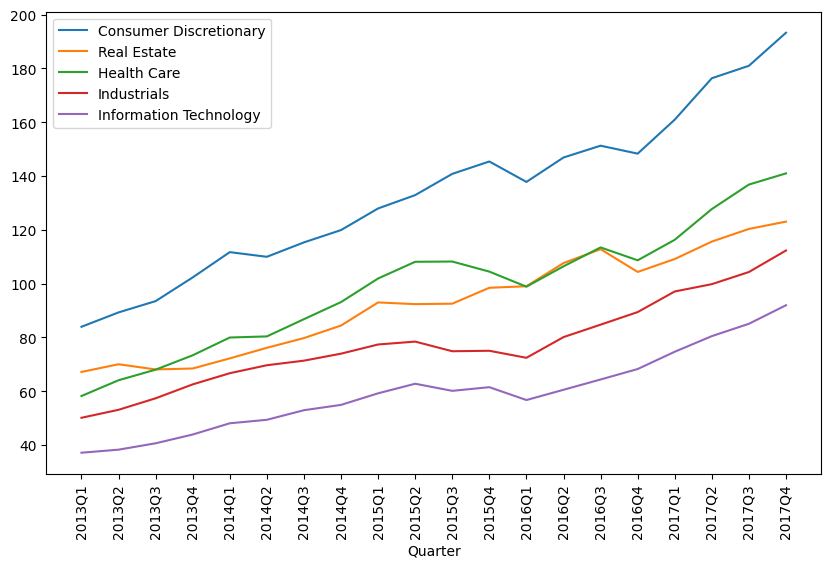

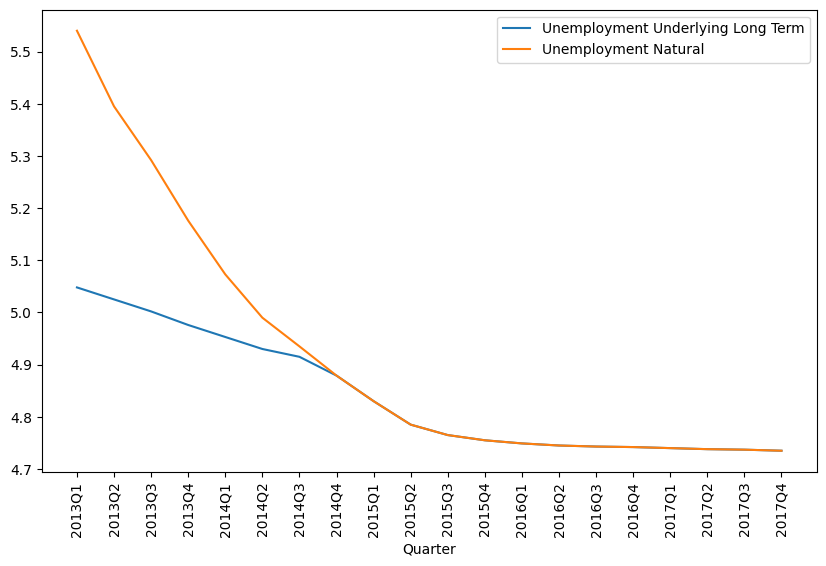

In [10]:
sectors_gdp_unemp_df = pd.merge(sectors_avg_df, gdp_unemp_df, left_index=True, right_index=True)

unemp_sectors_ax = sectors_gdp_unemp_df[["Consumer Discretionary", "Real Estate", "Health Care", "Industrials", "Information Technology"]].plot(figsize=(10,6))
unemp_sectors_ax.set_xticks(range(len(sectors_gdp_unemp_df)))
unemp_sectors_ax.set_xticklabels(sectors_gdp_unemp_df.index.tolist(), rotation=90)

unemp_ax = sectors_gdp_unemp_df[["Unemployment Underlying Long Term", "Unemployment Natural"]].plot(figsize=(10,6))
unemp_ax.set_xticks(range(len(sectors_gdp_unemp_df)))
unemp_ax.set_xticklabels(sectors_gdp_unemp_df.index.tolist(), rotation=90)

We then combined these 2 graphs to analyze the economic factors effects on those 5 GICS Sectors from the S&P 500. What we can see here is with higher unemployment rates, we will naturally have lower interest rates. By doing so we will see a faster increase in growth for consumer spending, real estate markets, and information technology. However, the opposite happens for the healthcare and industrial sectors. These sectors as the unemployment decreases tend to have a faster growth and as it starts to plateau or even increase the growth rate for those 2 sectors becomes slower. 

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19')]

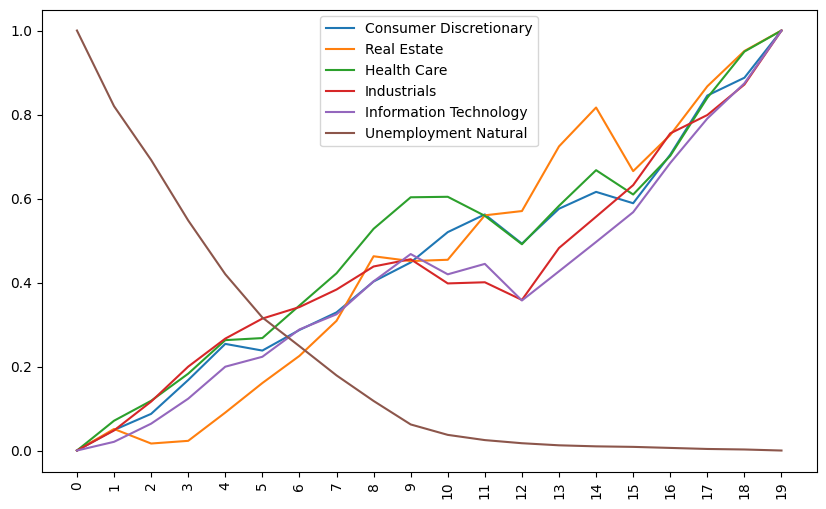

In [11]:
#Checking industries which would be affected by Unemployment with the Unemployment Natural. 
scaler = MinMaxScaler()
norm_columns = sectors_gdp_unemp_df.columns[1:]
df_normalized = pd.DataFrame(scaler.fit_transform(sectors_gdp_unemp_df[norm_columns]), columns=norm_columns)
df_normalized
unemp_ax = df_normalized[["Consumer Discretionary", "Real Estate", "Health Care", "Industrials", "Information Technology", "Unemployment Natural"]].plot(figsize=(10,6))
unemp_ax.set_xticks(range(len(df_normalized)))
unemp_ax.set_xticklabels(df_normalized.index.tolist(), rotation=90)

3 of the 11 sectors in the S&P 500 are known to fluctuate the most based on unemployment rates. These sectors include Energy, Materials, and Industrials. Our first visualization shows these 3 sectors performance over time. Then, a visualization of Real GDP adjusted for inflation as well as Nominal GDP over time.

[Text(0, 0, '2013Q1'),
 Text(1, 0, '2013Q2'),
 Text(2, 0, '2013Q3'),
 Text(3, 0, '2013Q4'),
 Text(4, 0, '2014Q1'),
 Text(5, 0, '2014Q2'),
 Text(6, 0, '2014Q3'),
 Text(7, 0, '2014Q4'),
 Text(8, 0, '2015Q1'),
 Text(9, 0, '2015Q2'),
 Text(10, 0, '2015Q3'),
 Text(11, 0, '2015Q4'),
 Text(12, 0, '2016Q1'),
 Text(13, 0, '2016Q2'),
 Text(14, 0, '2016Q3'),
 Text(15, 0, '2016Q4'),
 Text(16, 0, '2017Q1'),
 Text(17, 0, '2017Q2'),
 Text(18, 0, '2017Q3'),
 Text(19, 0, '2017Q4')]

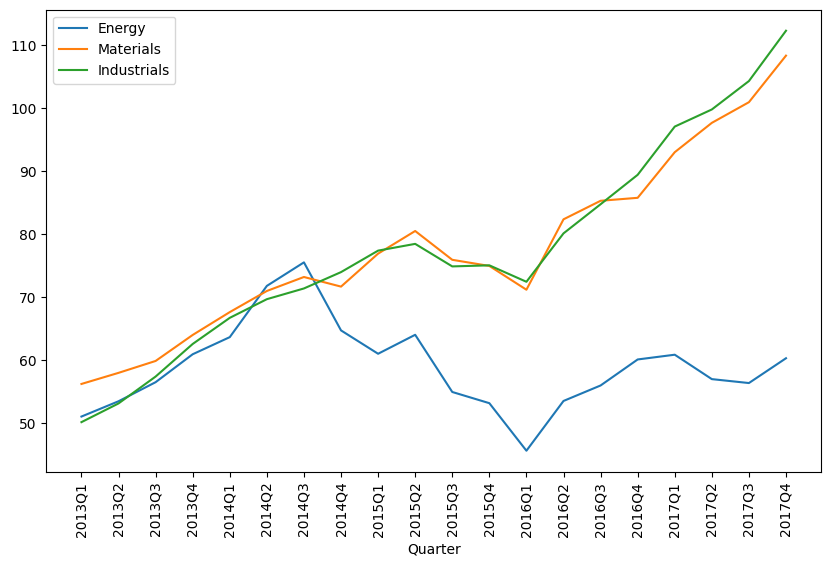

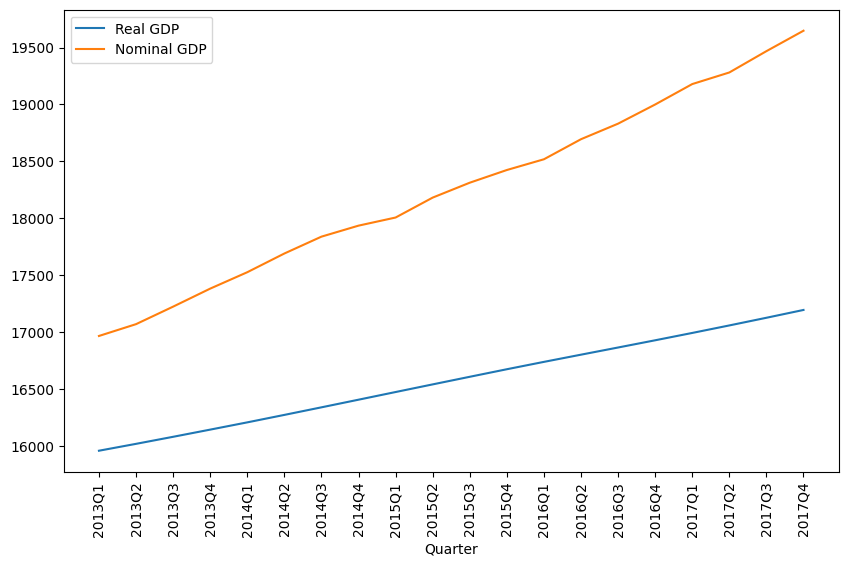

In [12]:
# looking at gdp down energy/industrials/materials should be down too. gdp down means people abroad are doing better than us.
gdp_sectors_ax = sectors_gdp_unemp_df[["Energy", "Materials", "Industrials"]].plot(figsize=(10,6))
gdp_sectors_ax.set_xticks(range(len(sectors_gdp_unemp_df)))
gdp_sectors_ax.set_xticklabels(sectors_gdp_unemp_df.index.tolist(), rotation=90)

gdp_ax = sectors_gdp_unemp_df[["Real GDP", "Nominal GDP"]].plot(figsize=(10,6))
gdp_ax.set_xticks(range(len(sectors_gdp_unemp_df)))
gdp_ax.set_xticklabels(sectors_gdp_unemp_df.index.tolist(), rotation=90)

This combined visualization of the adjusted GDP and the typical sectors it affects shows a general positive correlation between the sectors and GDP. The trend should be as GDP is down, energy, industrials, and materials should also be down  (in other words this is a linear relationship). A notable exception is the Energy sector. The reason the Energy sector is an exception to this trend is because during mid 2014 and early 2016 where the entire oil industry (which holds a large stake in the energy sector) plummeted. This skewed the data for the Energy sector, but its important to note still since it shows a good example of other factors creating shifts in the market. Article about the oil prices dropping linked [here](https://blogs.worldbank.org/en/developmenttalk/what-triggered-oil-price-plunge-2014-2016-and-why-it-failed-deliver-economic-impetus-eight-charts#:~:text=Between%20mid%2D2014%20and%20early,supply%2Ddriven%20collapse%20of%201986).

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19')]

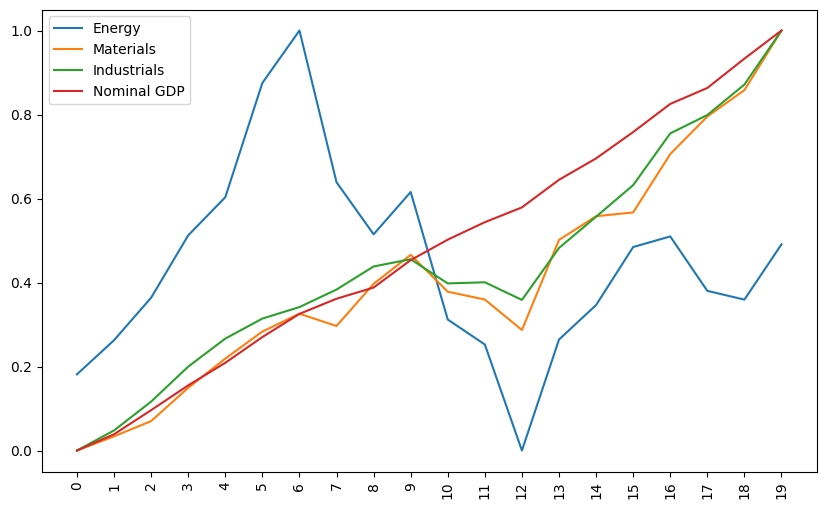

In [13]:
#Checking industries which would be effected by GDP with the nominal GDP. 
nat_unemp_ax = df_normalized[["Energy", "Materials", "Industrials", "Nominal GDP"]].plot(figsize=(10,6))
nat_unemp_ax.set_xticks(range(len(df_normalized)))
nat_unemp_ax.set_xticklabels(df_normalized.index.tolist(), rotation=90)

As an added bonus for visualization, we decided to show each sector’s normalized individual company performance.

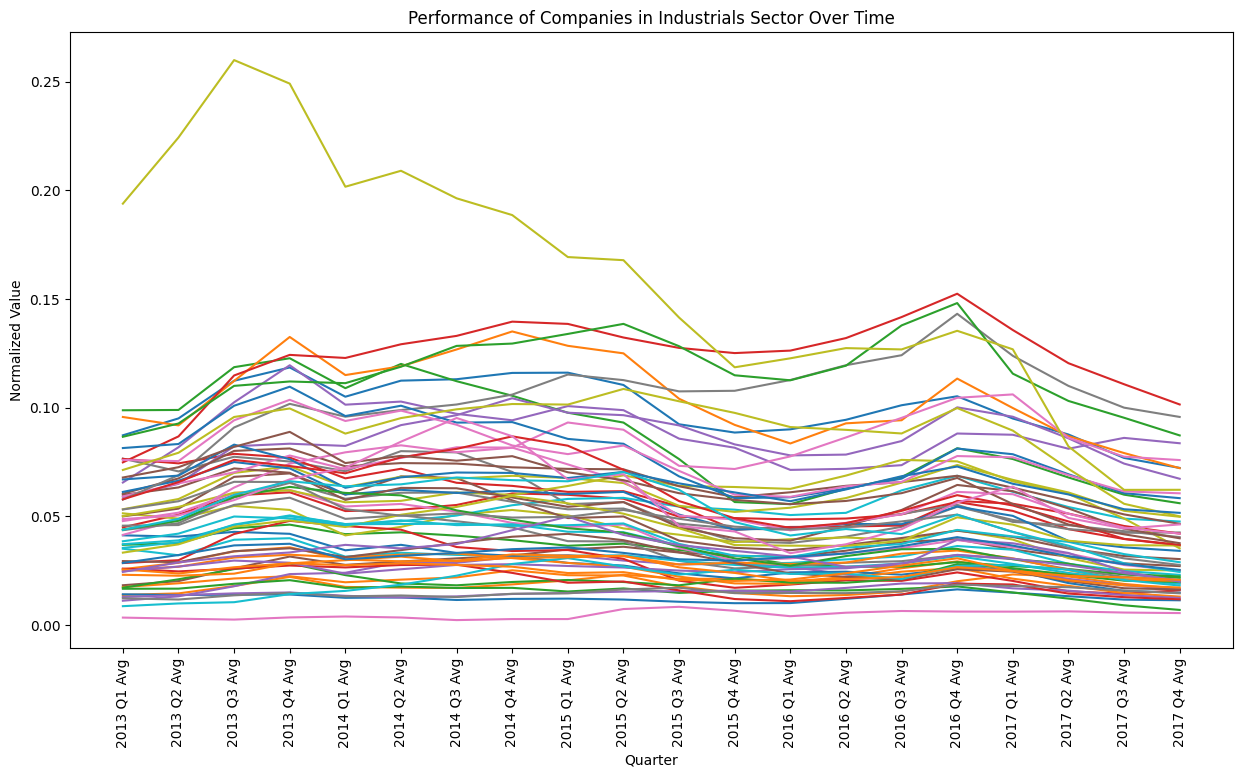

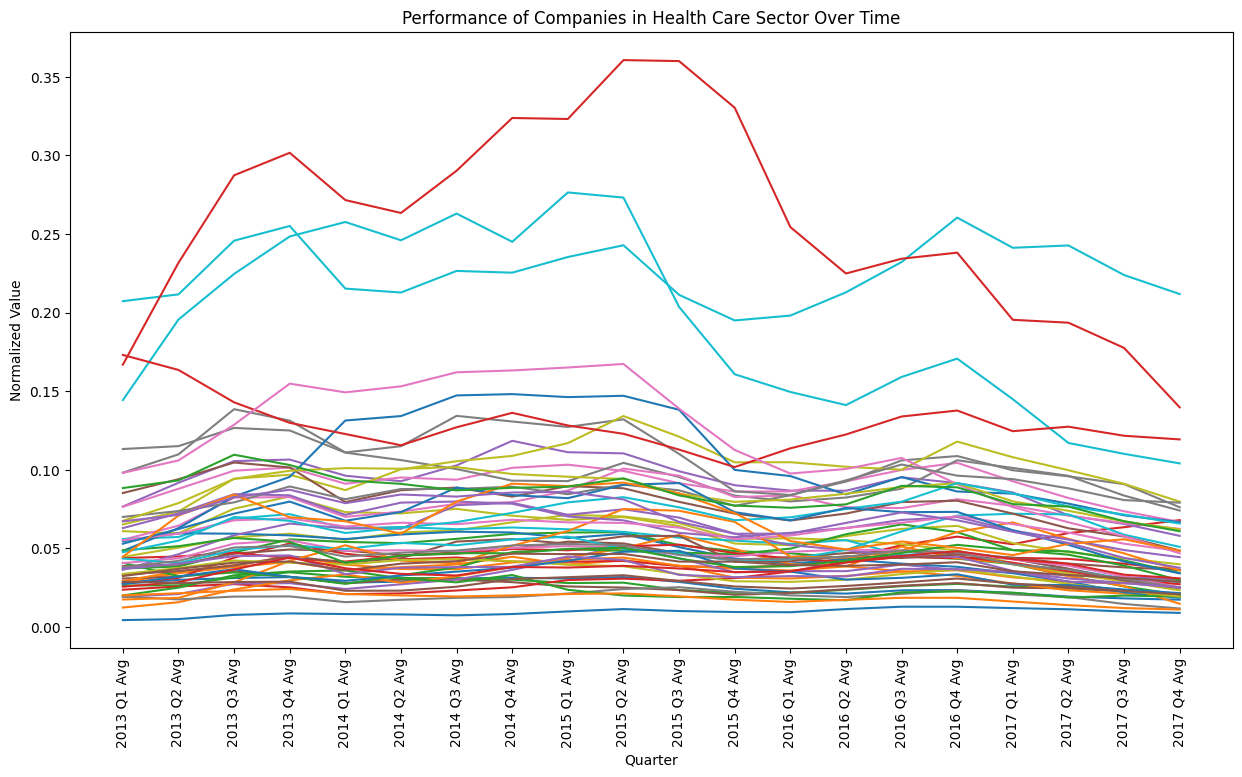

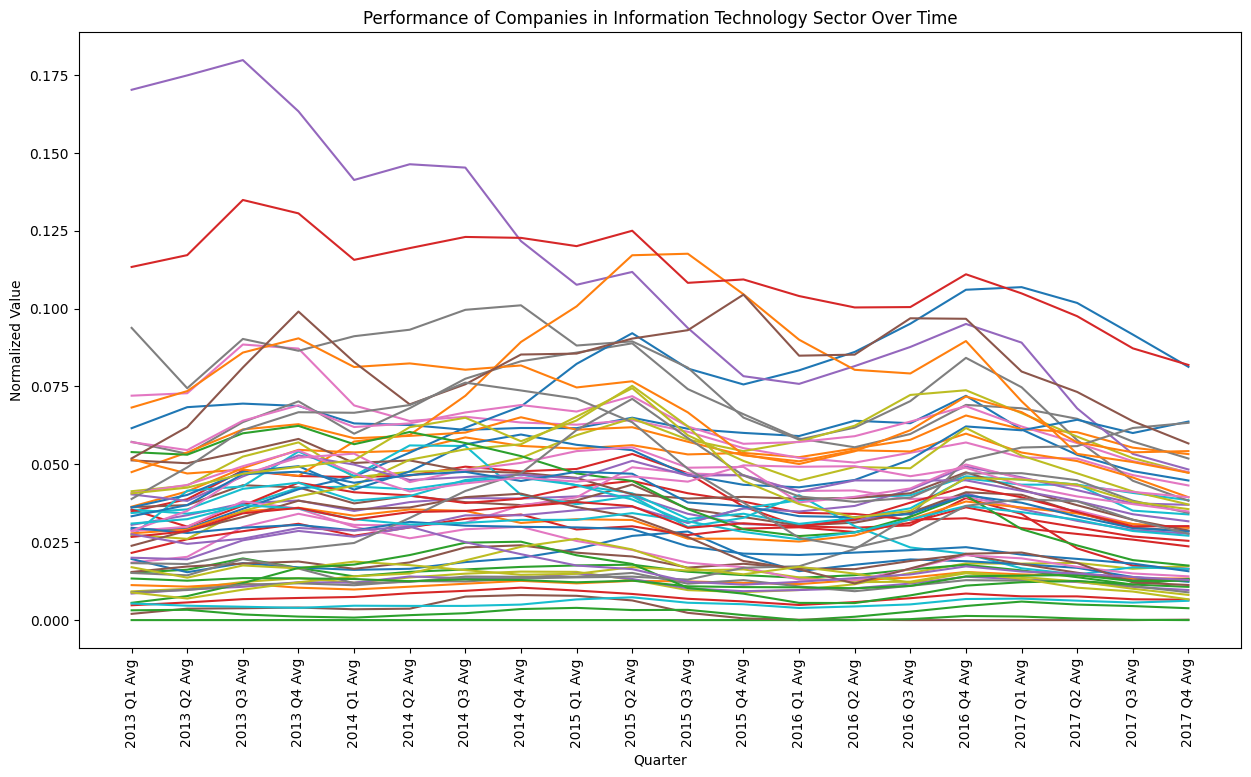

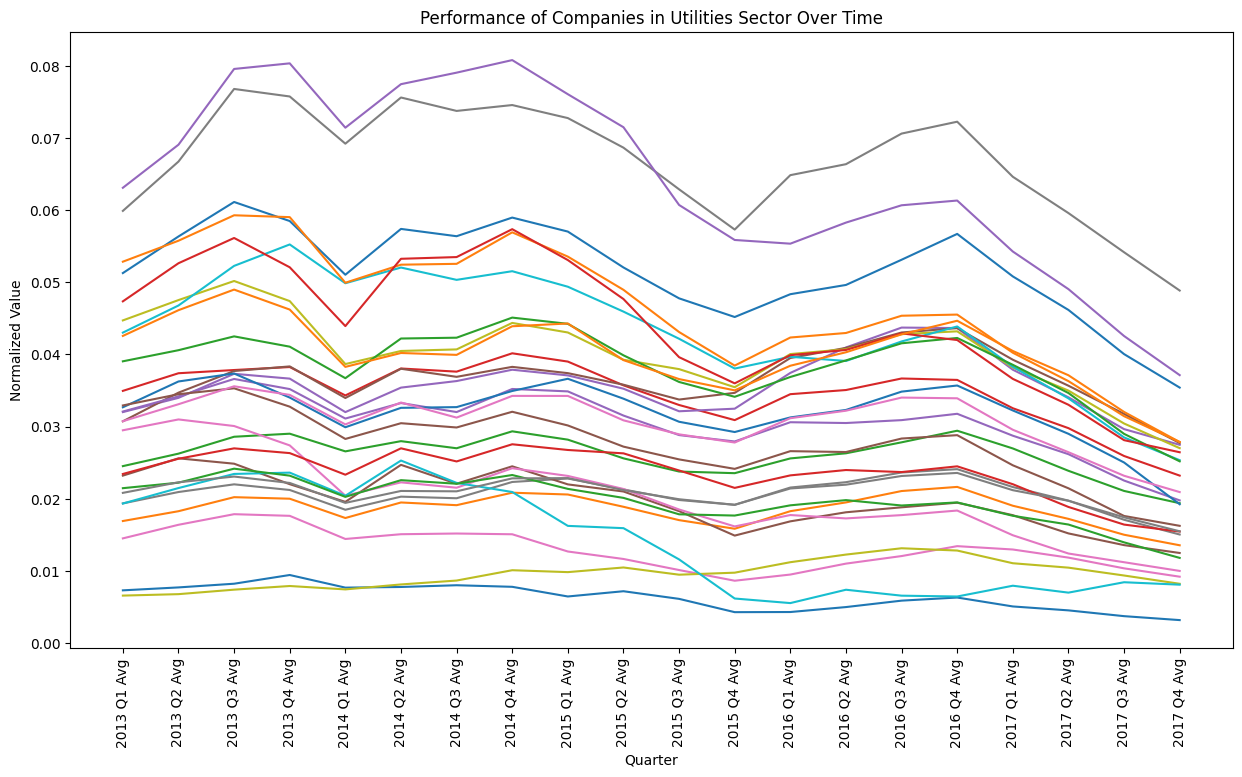

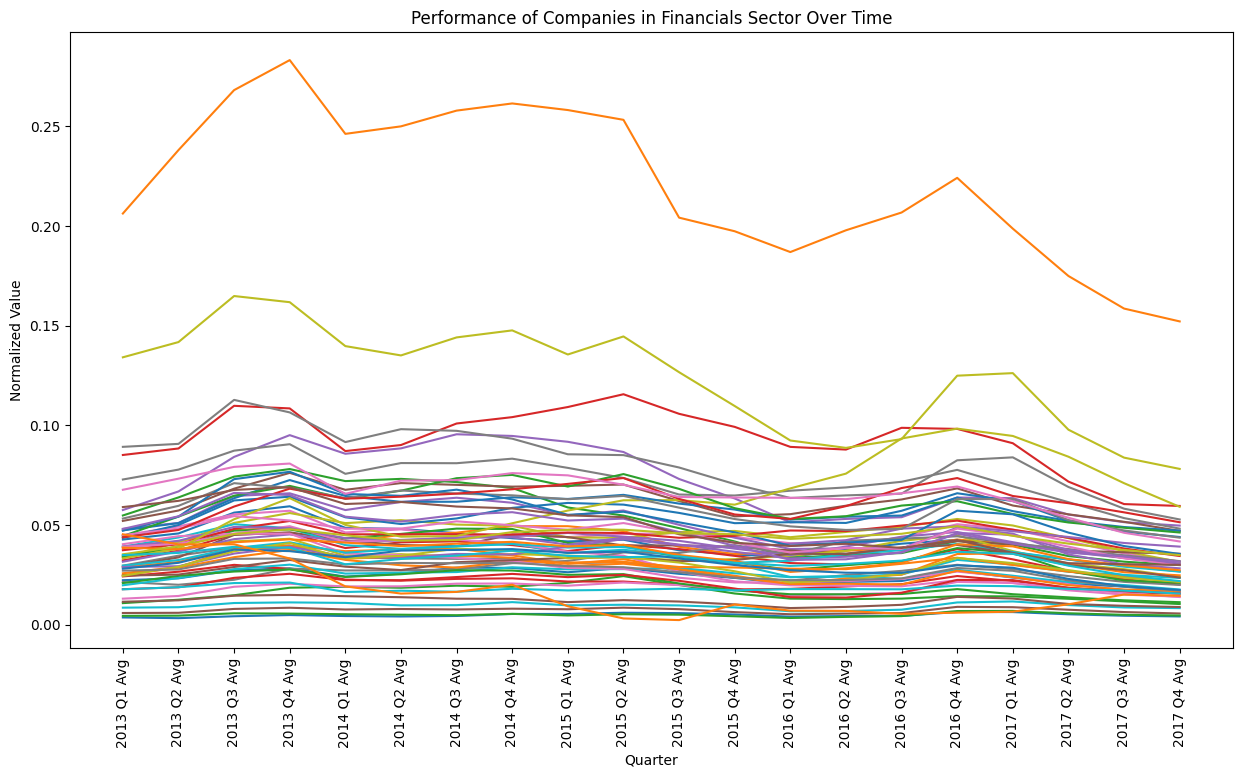

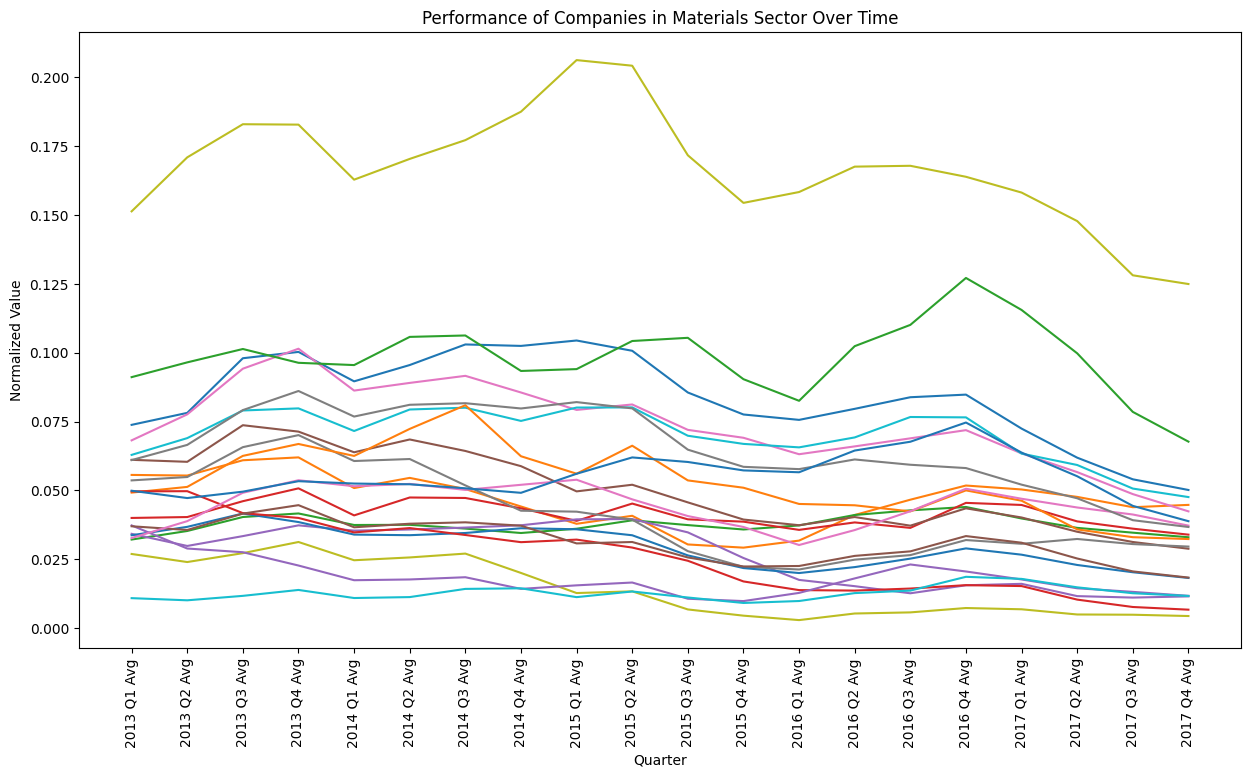

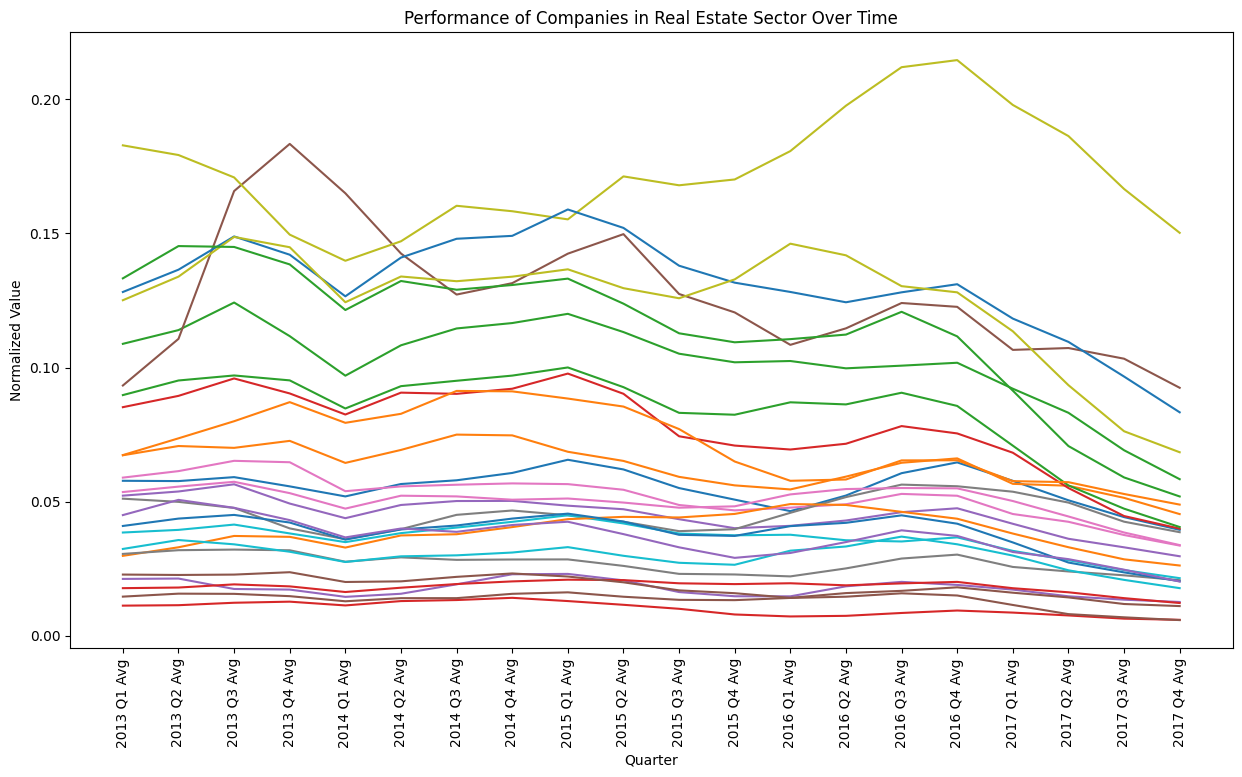

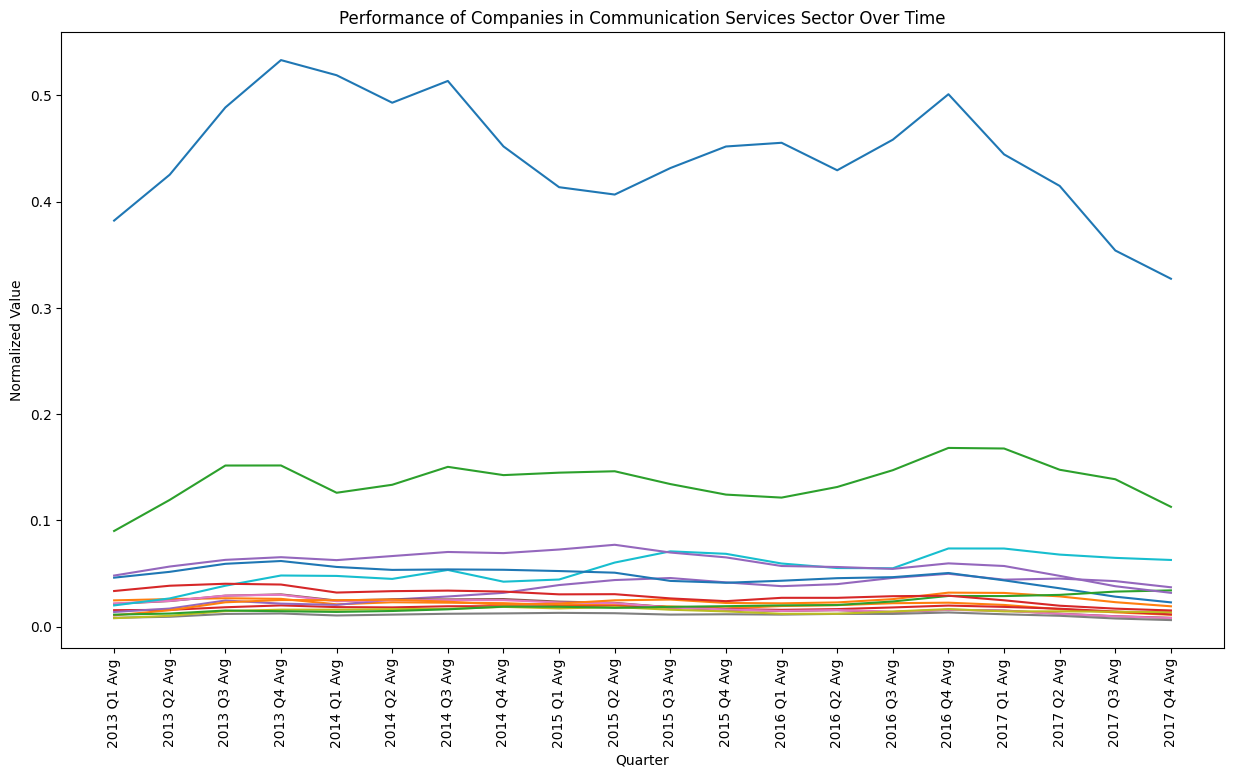

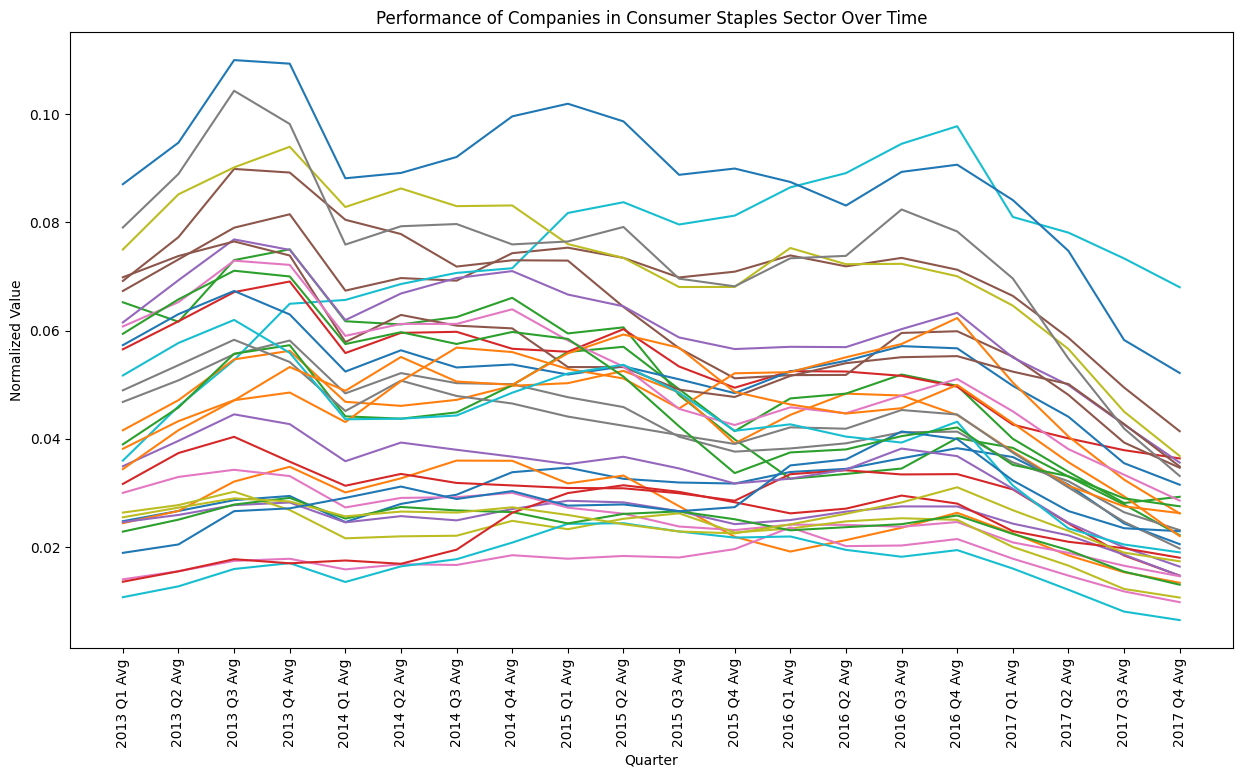

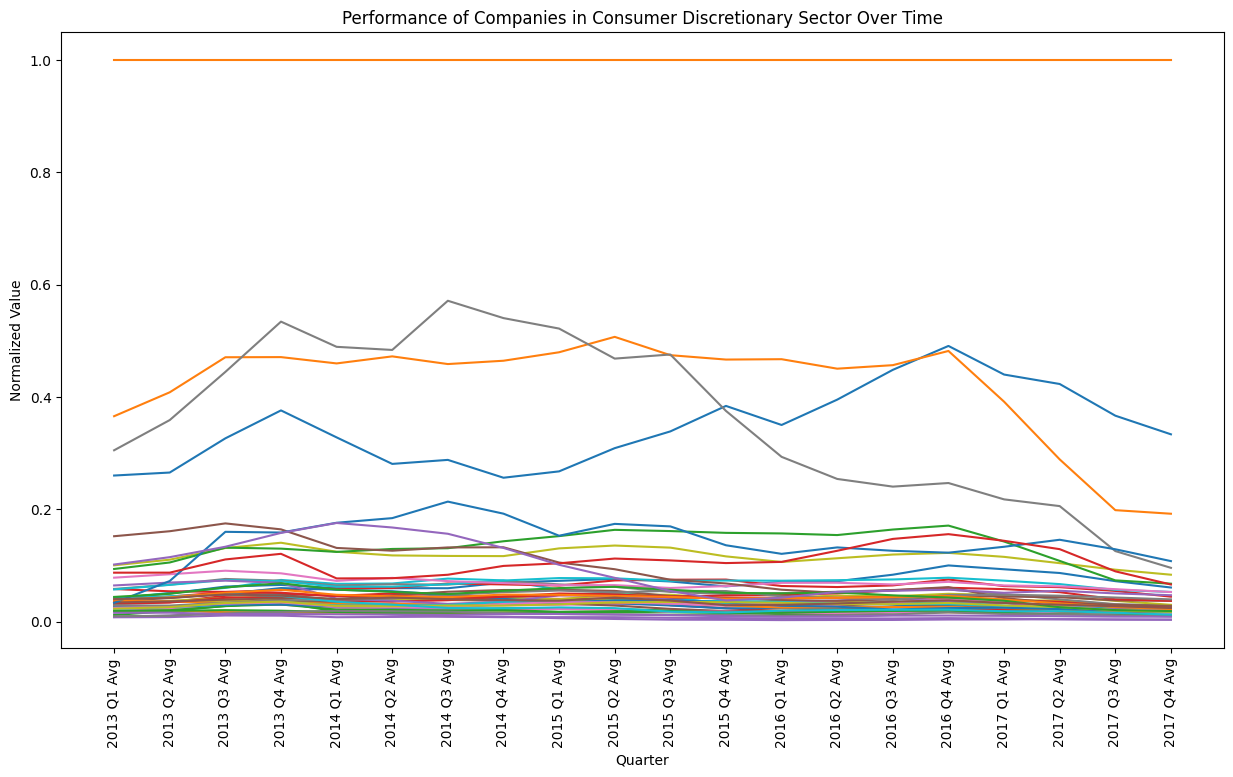

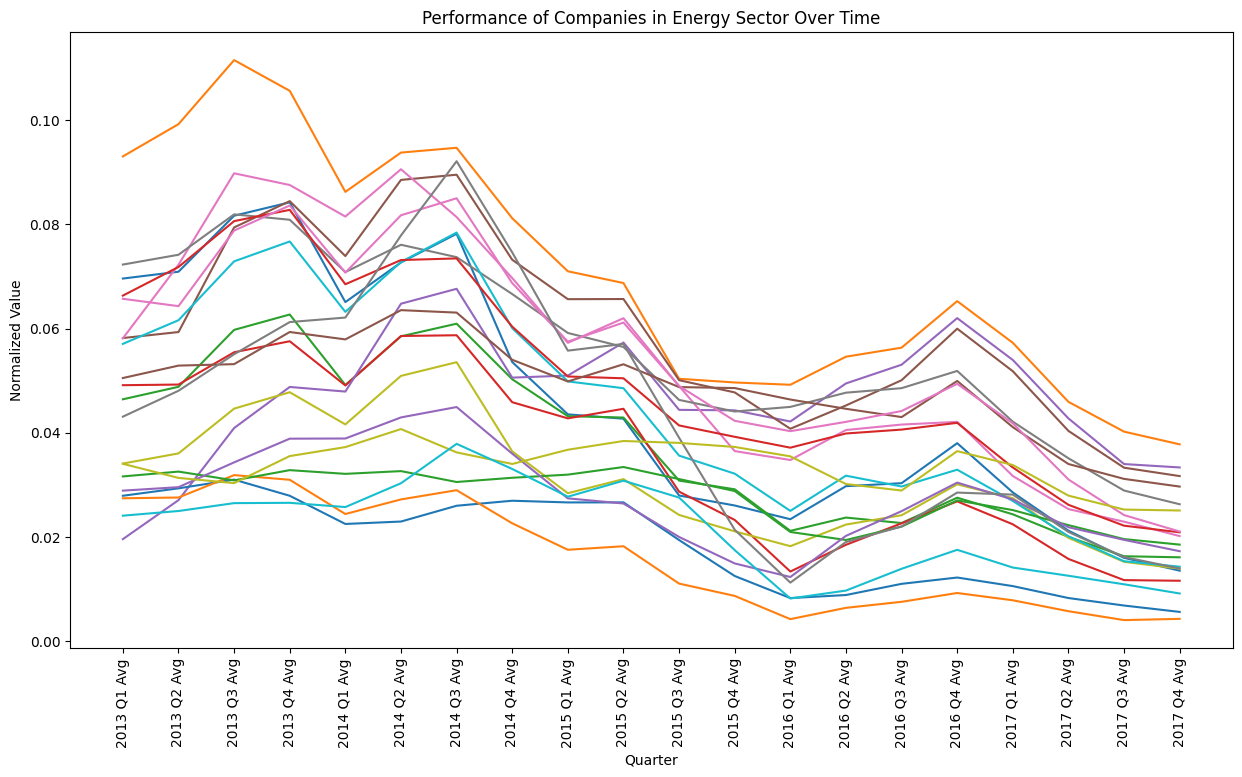

In [14]:
norm_cleaned_stocks_df = cleaned_stocks_df
quarterly_avg_cols = [col for col in cleaned_stocks_df.columns if 'Avg' in col]
scaler = MinMaxScaler()
norm_cleaned_stocks_df[quarterly_avg_cols] = scaler.fit_transform(cleaned_stocks_df[quarterly_avg_cols])
for sector in norm_cleaned_stocks_df['GICS  Sector'].unique():
    sector_data = norm_cleaned_stocks_df[norm_cleaned_stocks_df['GICS  Sector'] == sector]

    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot each company's data points within the sector
    for company in sector_data.index:
        company_data = sector_data.loc[company, quarterly_avg_cols]
        ax.plot(quarterly_avg_cols, company_data, label=sector_data.loc[company, 'Symbol'])

    ax.set_xticks(range(len(quarterly_avg_cols)))
    ax.set_xticklabels(quarterly_avg_cols, rotation=90)

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Normalized Value")
    ax.set_title(f"Performance of Companies in {sector} Sector Over Time")
    
    plt.show()


#### Linear Regression
This visualization serves to display the general trend of each sector as a whole over the course of this tutorial’s scope. A more in-depth linear regression of the data is displayed later in this tutorial, but this representation is helpful just to show basic sector performance in relation to our economic factors. 

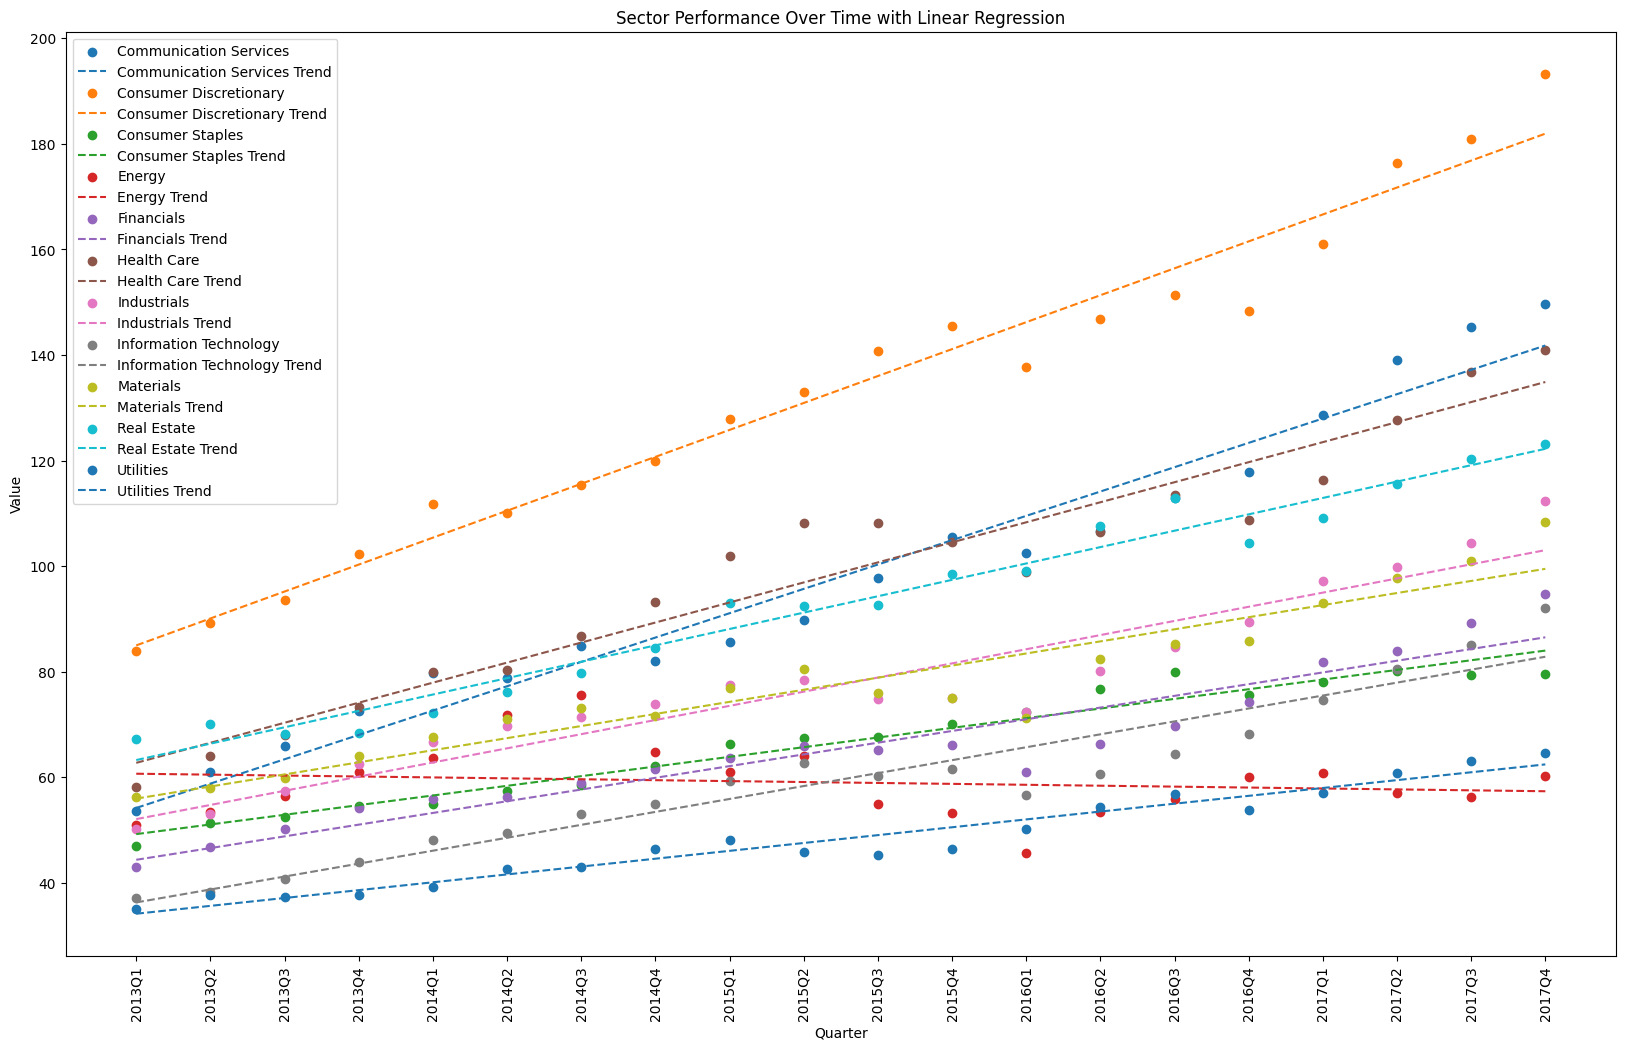

In [15]:
#linear regression of the cleaned S&P500 by industry (GICS Cateogry)
sectors_reset_index = sectors_gdp_unemp_df.reset_index()
fig, ax = plt.subplots(figsize=(20, 12))

# Plot each sector
for sector in sectors:
    ax.scatter(sectors_reset_index["Quarter"], sectors_reset_index[sector], label=sector)

    # Fit linear regression
    X = np.arange(len(sectors_reset_index)).reshape(-1, 1)
    y = sectors_reset_index[sector].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    ax.plot(sectors_reset_index["Quarter"], y_pred, label=f'{sector} Trend', linestyle='--')

ax.set_xticks(range(len(sectors_reset_index)))
ax.set_xticklabels(sectors_reset_index["Quarter"], rotation=90)

ax.set_xlabel("Quarter")
ax.set_ylabel("Value")
ax.set_title("Sector Performance Over Time with Linear Regression")
ax.legend()

plt.show()

#### Explaining the Relevance of a Hypothesis Test

Our hypothesis is that there is a linear relationship between our economic factors and the individual sectors in the S&P 500. Using the below formulas, if the calculated p-value is below 0.05, then it is quite likely that there is a linear relationship between the economic factors and the sectors of the S&P 500

$$
\text{variance} = \text{MSE} \times \left( \text{diag}\left( \left( X^T X \right)^{-1} \right) \right)
$$
$$
\text{standard\_errors} = \sqrt{\text{variance}}
$$
$$
\text{tvalues} = \frac{\text{model.coef}}{\text{standard\_errors}}
$$
$$
\text{p\_values} = [2 \times (1 - \text{stats.t.cdf}(|t|, n-k-1)) \text{ for } t \text{ in } \text{t\_values}]
$$


#### Correlation Analysis

Our next piece of data analysis includes a correlation matrix detailing the strength of correlation between sectors’ performances, gdp, and unemployment. The matrix also indicates a positive or negative correlation (-1 being the strongest negative correlation and 1 being the strongest positive correlation). For example, we can see a strong negative correlation between unemployment rates and the performance of most sectors. We can also see a strong positive correlation between the GDP and sector performance. Energy showed a poor correlation because of what was discussed about skewed data, above.

Seaborn visualization library found [here](https://seaborn.pydata.org/)

To learn more about correlation analysis and regression [click here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression)

                                   Communication Services  \
Communication Services                           1.000000   
Consumer Discretionary                           0.987924   
Consumer Staples                                 0.935060   
Energy                                          -0.101493   
Financials                                       0.978598   
Health Care                                      0.959232   
Industrials                                      0.971948   
Information Technology                           0.975336   
Materials                                        0.967361   
Real Estate                                      0.957317   
Utilities                                        0.967086   
Real GDP                                         0.981291   
Nominal GDP                                      0.987339   
Unemployment Underlying Long Term               -0.874037   
Unemployment Natural                            -0.805601   

                       

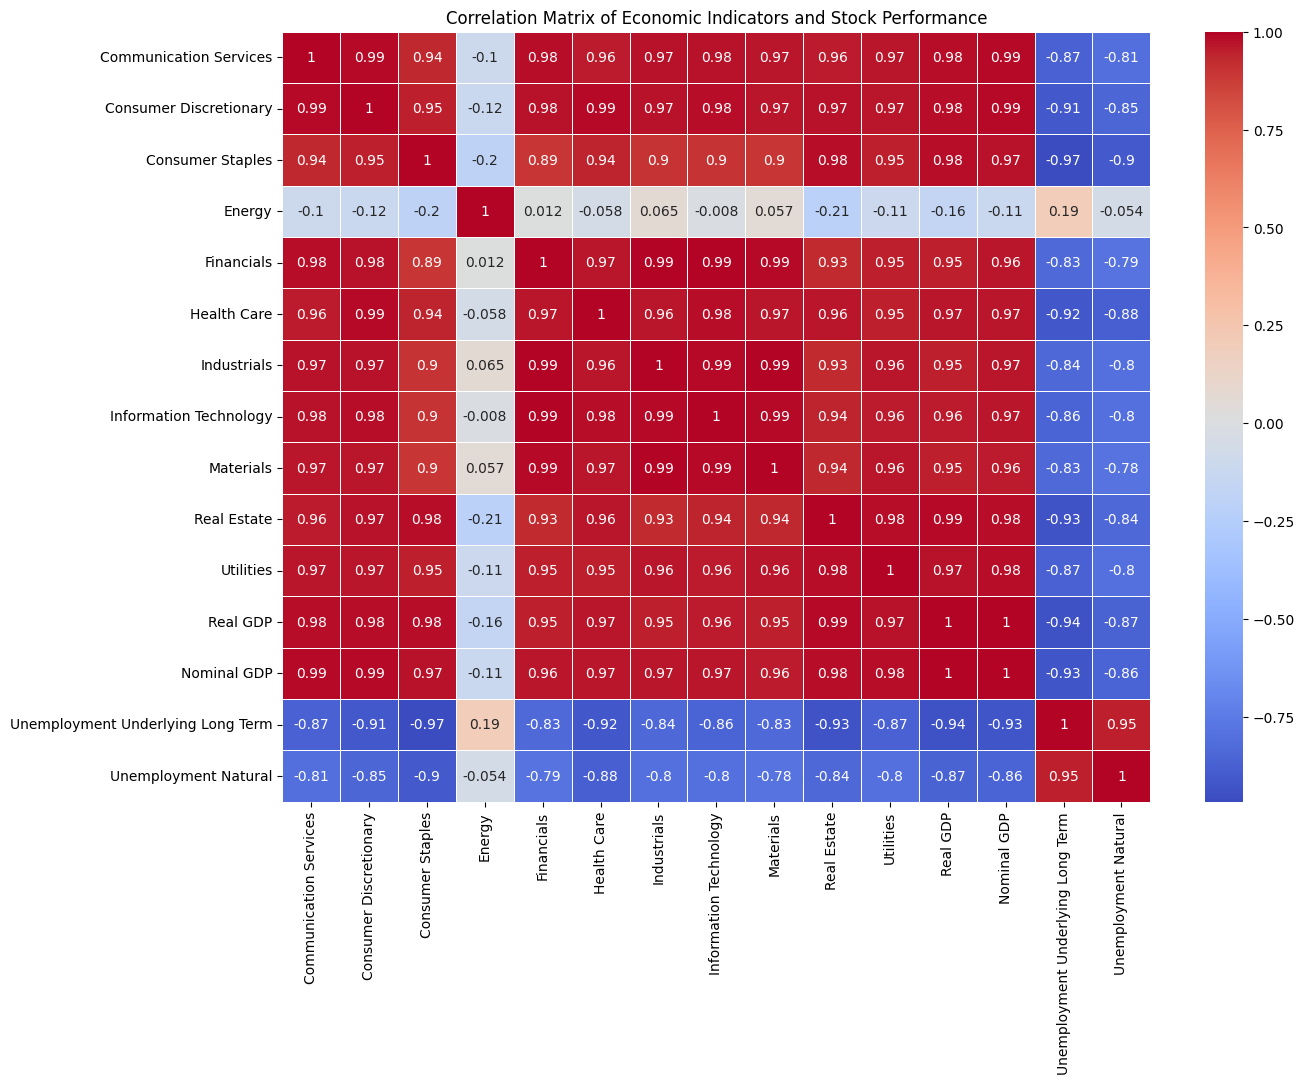

In [16]:

#Lecture 9 (correlation between 2 varialbes) 
df_reset = sectors_gdp_unemp_df.reset_index()
numeric_df = df_reset.drop(columns=['Quarter'], errors='ignore')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators and Stock Performance')
plt.show()

<a id="model"></a>
### <b>Analysis, Hypothesis Testing, and Machine Learning</b>

#### Our Model Choice Analysis

When deciding on which model to use we took into consideration KNN, SVM, SGD, CART, Random Forest, and a Linear/Multivariate Regression. Our analysis for choosing is below. 

1. K-Nearest Neighbors (KNN)

    Strengths:

        Simplicity: Easy to understand

        Data Size: Works well with small to medium datasets

        Interpretability: Easy to interpret and visualize

    Weaknesses:

        Not Scalable: Not suitable for large datasets because it requires significant memory and computation power

        Sensitivity: Performance can be decreased by irrelevant data features

        Distance Metric: Very dependent on the choice of distance metric, meaning the wrong metric can ruin the whole model

2. Support Vector Machines (SVM)

    Strengths:

        Effective with Many Features: Works well when the number of dimensions/features is greater than the number of samples.

        Memory Efficient

        Robustness: Because it is effective when the number of features exceeds the number of samples, it is a very consistent and robust model

    Weaknesses:

        Training Time: Computationally intensive and time-consuming for large datasets

        Choice of Kernel: Requires careful tuning of the kernel and regularization parameter

        Lack of Interpretability: Harder to interpret the model compared to simpler ones like linear regression

3. Stochastic Gradient Descent (SGD)

    Strengths:

        Efficiency: Suitable for a larger scale and very efficient when dealing with large datasets

        Online Learning: Capable of updating the model incrementally as new data arrives. Perfect in the long run for stock and economic data

        Flexibility: Can be used with a variety of loss functions

    Weaknesses:

        Convergence Issues: Can converge to less than optimal solutions or diverge if the learning rate is not properly tuned

        Needs to be Normalized: The performance is sensitive to the scaling of the input features.

5. Classification and Regression Trees (CART)

    Strengths:

        Interpretability: Easy to interpret and visualize.

        Non-linearity: Can capture nonlinear relationships between features

        No Need for Normalization

    Weaknesses:

        Overfitting: Prone to overfitting

        Instability: Small changes in the data can result in a completely different tree.

        Bias-Variance Tradeoff: Requires careful tuning of tree depth to balance bias and variance.




6. Random Forest

    Strengths:

        Robustness: Reduces overfitting by averaging multiple decision trees

        Handles Missing Data: Can handle missing values effectively if not cleaned (irrelevant to this, though)

        Versatility: Works well with both classification and regression

    Weaknesses:

        Complexity: Harder to interpret compared to a single decision tree

        Computationally Intensive: Requires significant computational resources for large datasets

7. Linear/Multivariate Regression

    Strengths:

        Simplicity: Easiest by far interpret and visualize

        Efficiency: Computationally efficient for small to medium-sized datasets.

        Assumptions: Works well when the relationship between features and target is approximately linear

    Weaknesses:

        Linearity: Assumes a linear relationship between the features and target, which is not always the case
        
        Outliers: Sensitive to outliers, which can skew the results

Further info about many of these models can be found [here](https://bookdown.org/anshul302/paml/jul-1824-regression-and-classification-with-knn-decision-trees-and-random-forest.html).

Comparing all of these strengths and weaknesses led us to conclude that the best models for our data set, taking into account its size and structure(number of features and data points), would be a Linear Regression, Random Forest Model, and Stochastic Gradient Descent. Each model covers a different assumption of the data and we believe that this group of 3 covers as many pertinent perspectives with as little redundancy as possible.


#### Linear Regression
We chose to continue with a more in depth trained and tested linear regression model because based on the initial linear regression and the correlation analysis, it was clear that the sectors are linearly related to each other to some degree (i.e. a vast majority of the numbers in the correlation heatmap are near 1 or -1).


In [17]:
#make this into a function so it can be used for everything else
def LinReg(size, sector):
    X = sectors_gdp_unemp_df.drop(columns=[sector])
    y = sectors_gdp_unemp_df[sector]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, y_train)

    # Predictions and evaluation
    y_pred = lin_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Plot prediction vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values for ' + sector)
    plt.grid(True)
    plt.show()

Mean Squared Error: 30.024296579397454


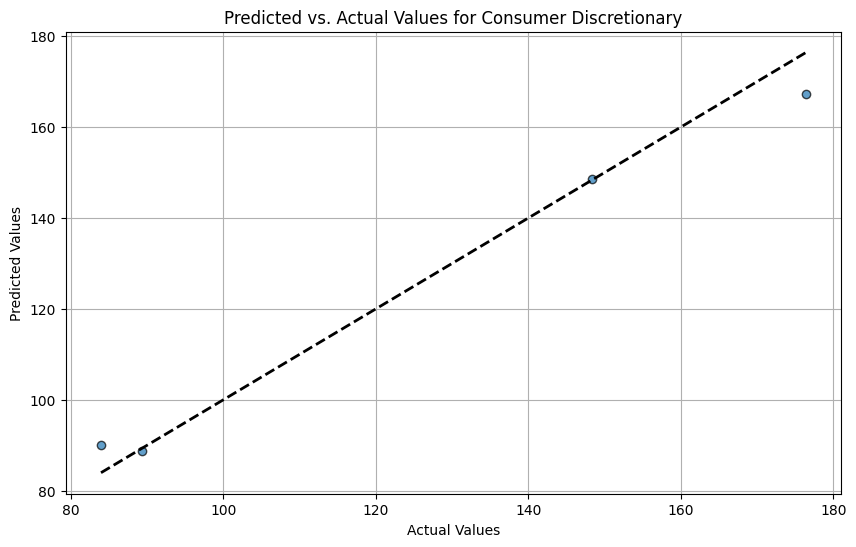

In [18]:
LinReg(0.2, "Consumer Discretionary")

Mean Squared Error: 3.7438870909191553


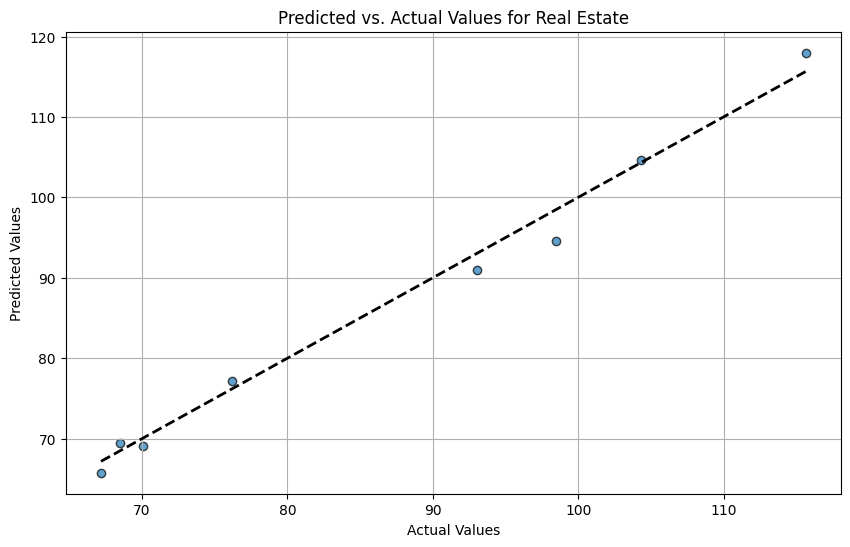

In [19]:
LinReg(0.4, "Real Estate")

Mean Squared Error: 4.564097219785389


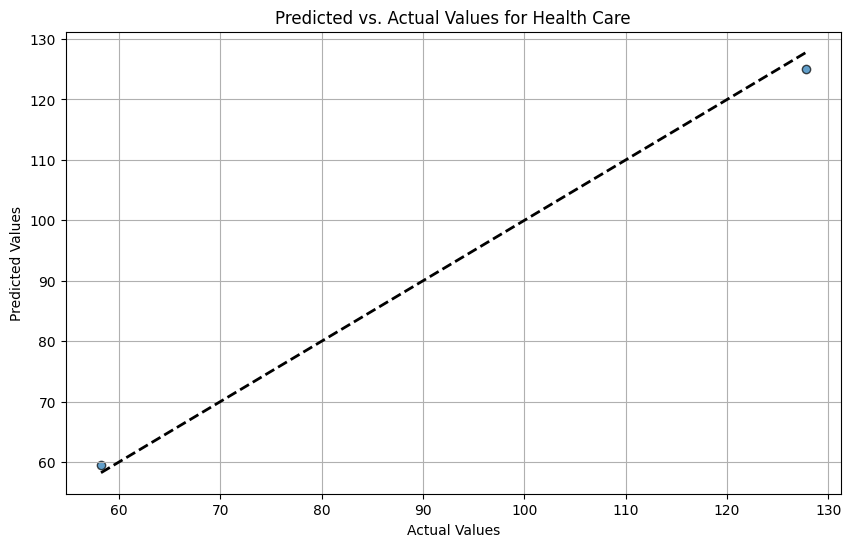

In [20]:
LinReg(0.1, "Health Care")

Mean Squared Error: 6.675113759988081


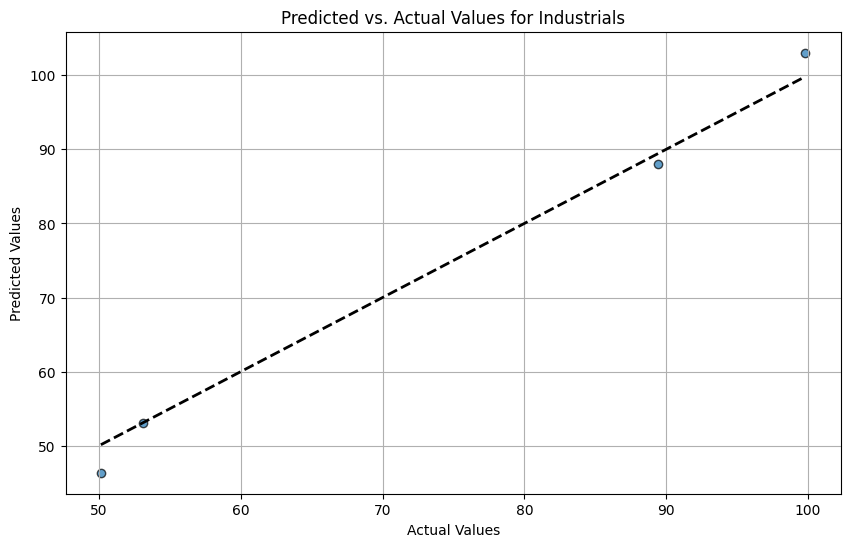

In [21]:
LinReg(0.2, "Industrials") 

Mean Squared Error: 0.6960937172195818


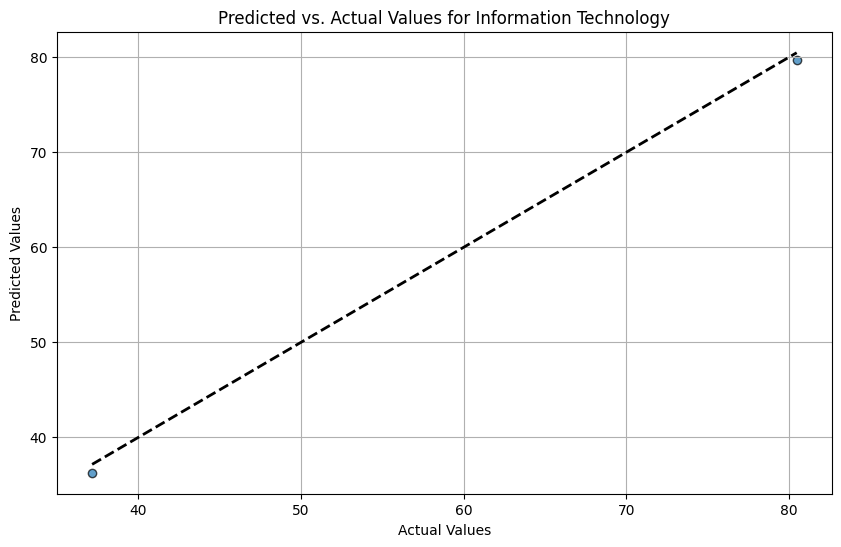

In [22]:
LinReg(0.1, "Information Technology")

Mean Squared Error: 9.589620069450447


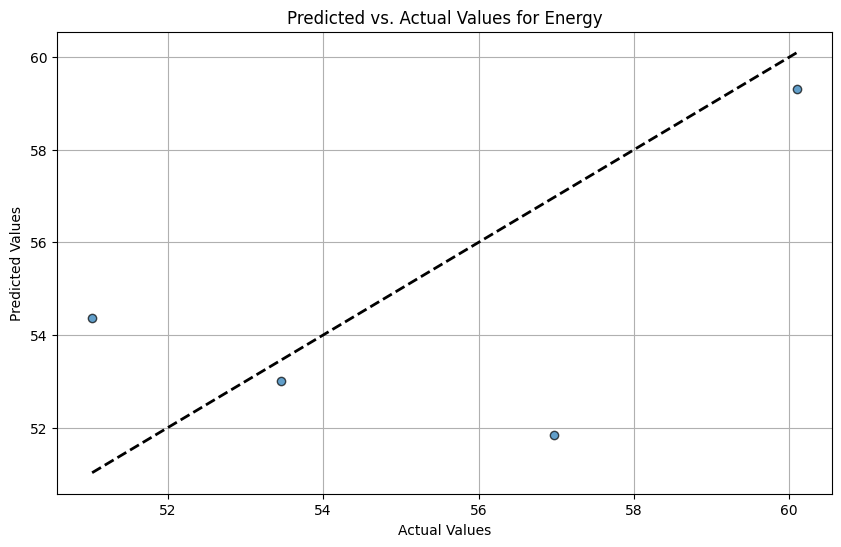

In [23]:
LinReg(0.2, "Energy")

Mean Squared Error: 1.9131354533793314


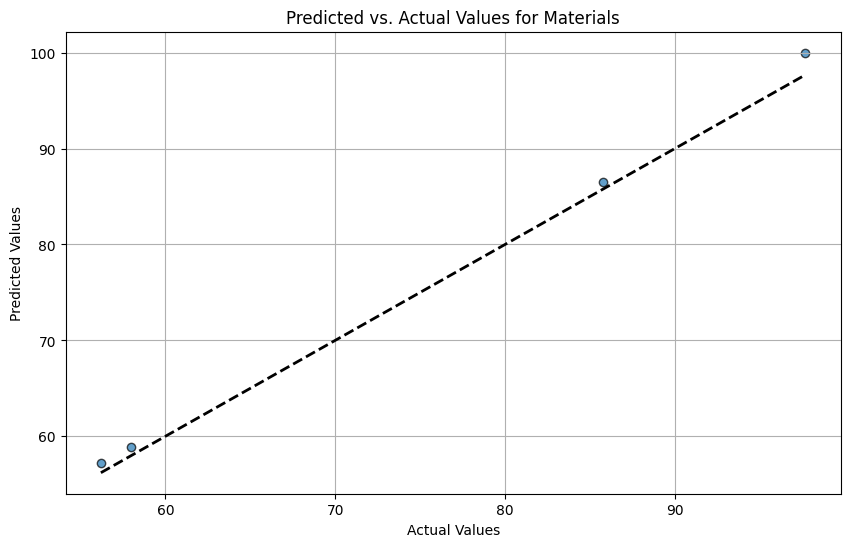

In [24]:
LinReg(0.2, "Materials")

#### Random Forest

We chose to also use a Random Forest Model for each sector because of its robust nature and ability to handle large amounts of features without overfitting. After running the random forest on each sector individually, we found that our model is between 87.5% and 100% accurate, depending on the sector. It is likely, however, that the 100% accurate models may have been mildly skewed by the lower amount of data in that sector.

In [25]:

def RandForest(size, sector):
    X = sectors_gdp_unemp_df.drop(columns=[sector])
    y = sectors_gdp_unemp_df[sector]

    median_value = y.median()
    y_binary = (y > median_value).astype(int)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=size, random_state=42)

    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = rf_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for ' + sector)
    plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[5 0]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



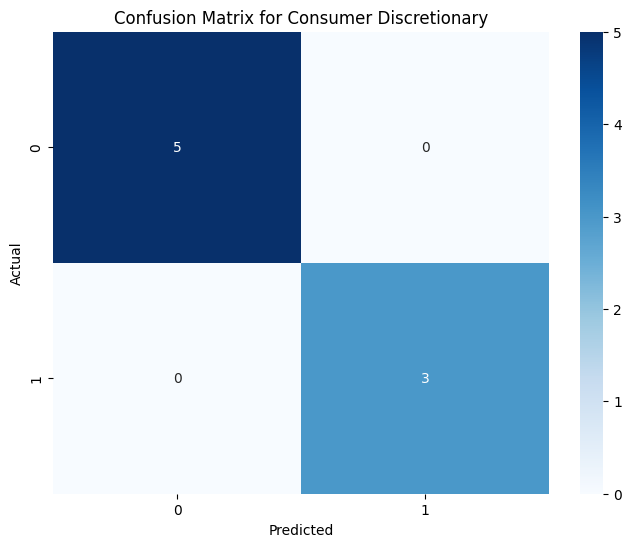

In [26]:
RandForest(0.4, "Consumer Discretionary")

Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.875
F1-Score: 0.9333333333333333
Confusion Matrix:
[[7 0]
 [1 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



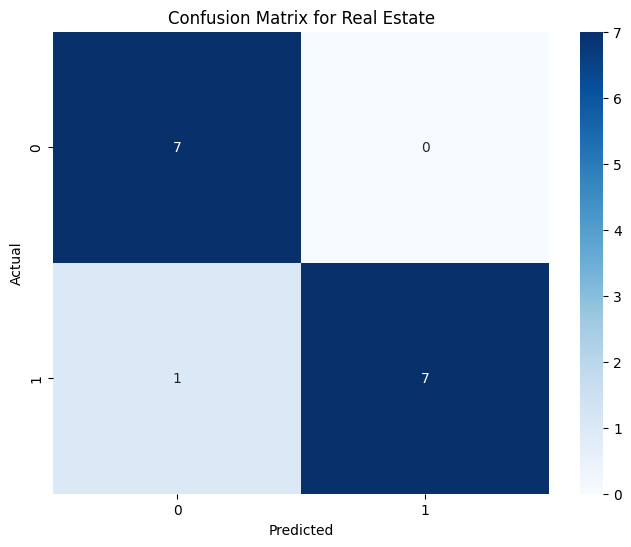

In [27]:
RandForest(0.75, "Real Estate")

Accuracy: 0.9375
Precision: 0.8888888888888888
Recall: 1.0
F1-Score: 0.9411764705882353
Confusion Matrix:
[[7 1]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



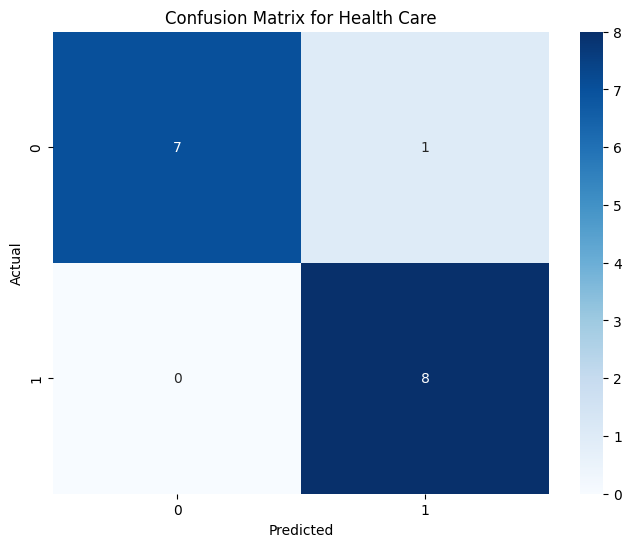

In [28]:
RandForest(0.8, "Health Care")

Accuracy: 0.9
Precision: 1.0
Recall: 0.8333333333333334
F1-Score: 0.9090909090909091
Confusion Matrix:
[[4 0]
 [1 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



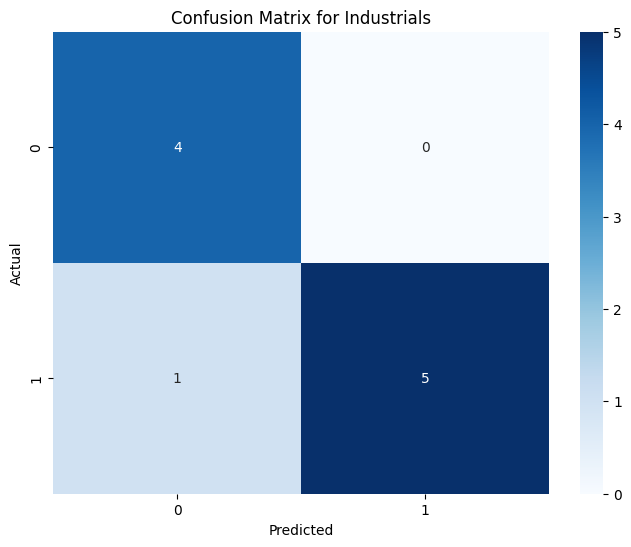

In [29]:
RandForest(0.5, "Industrials")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[6 0]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



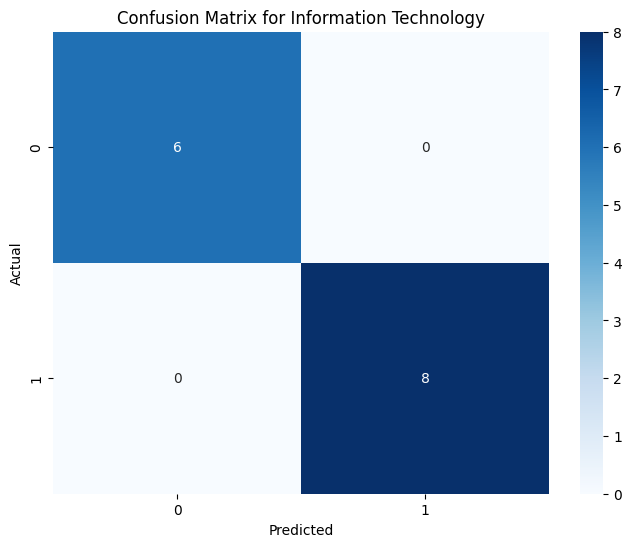

In [30]:
RandForest(0.7, "Information Technology")

Accuracy: 0.9166666666666666
Precision: 0.8571428571428571
Recall: 1.0
F1-Score: 0.9230769230769231
Confusion Matrix:
[[5 1]
 [0 6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



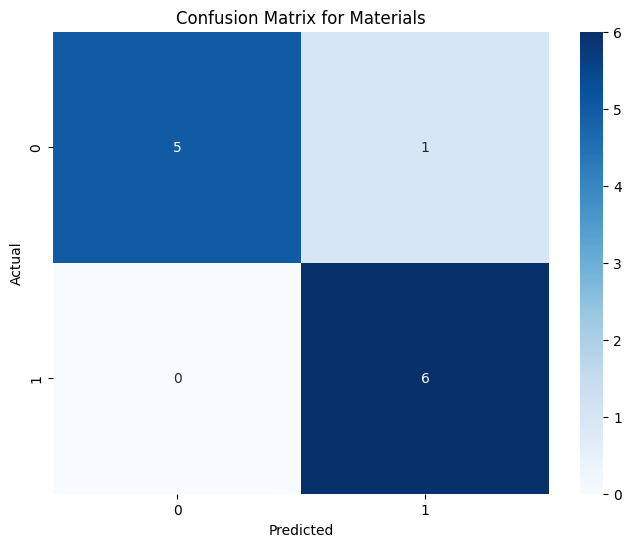

In [31]:
RandForest(0.6, "Materials")

Accuracy: 0.875
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
Confusion Matrix:
[[4 0]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



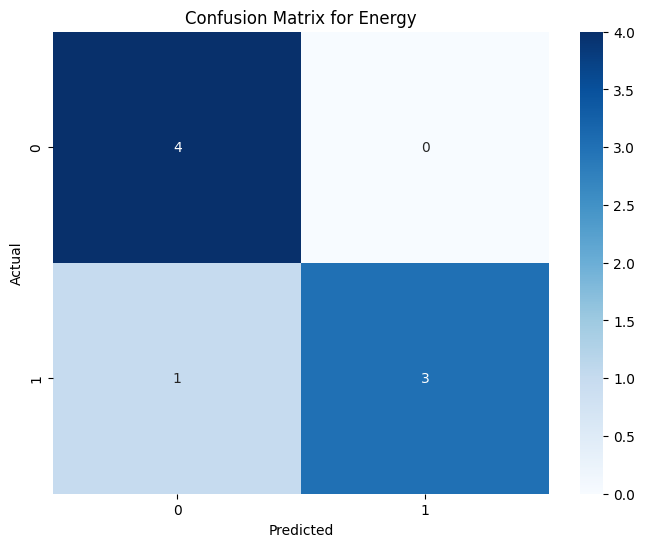

In [32]:
RandForest(0.4, "Energy")

#### Stochastic Gradient Descent

Lastly, our case for using a Stochastic Gradient Descent was the strongest of the models for multiple reasons. The most notable being:
SGD’s efficiency with larger data sets
SGD’s ability to be updated as new data arrives, which would future-proof the model to some extent if any new stock market/economic factor data gets added

In [33]:

def SGDReg(size, sector):
    X = sectors_gdp_unemp_df.drop(columns=[sector])
    y = sectors_gdp_unemp_df[sector]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train
    sgd_reg = SGDRegressor(max_iter=100000, tol=1e-3, random_state=42)
    sgd_reg.fit(X_train_scaled, y_train)

   # Predict and evaluate
    y_pred = sgd_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values for ' + sector )
    plt.grid(True)
    plt.show()

Mean Squared Error: 7.098322600123848


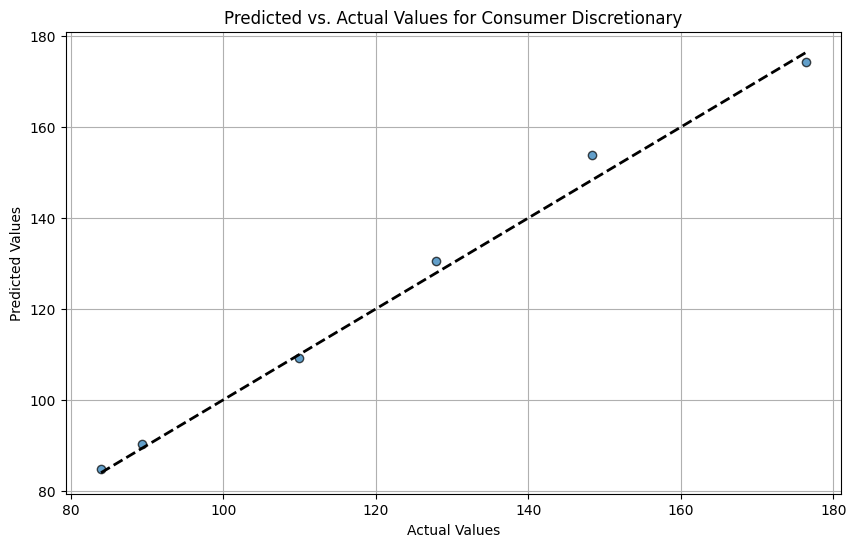

In [34]:

SGDReg(0.3, "Consumer Discretionary")

Mean Squared Error: 9.264085113648346


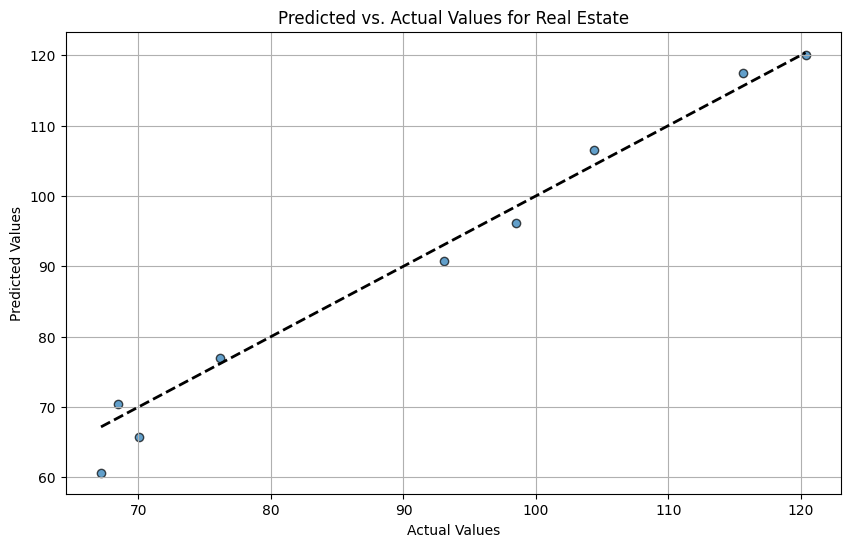

In [35]:
SGDReg(0.45, "Real Estate")

Mean Squared Error: 5.91806112583378


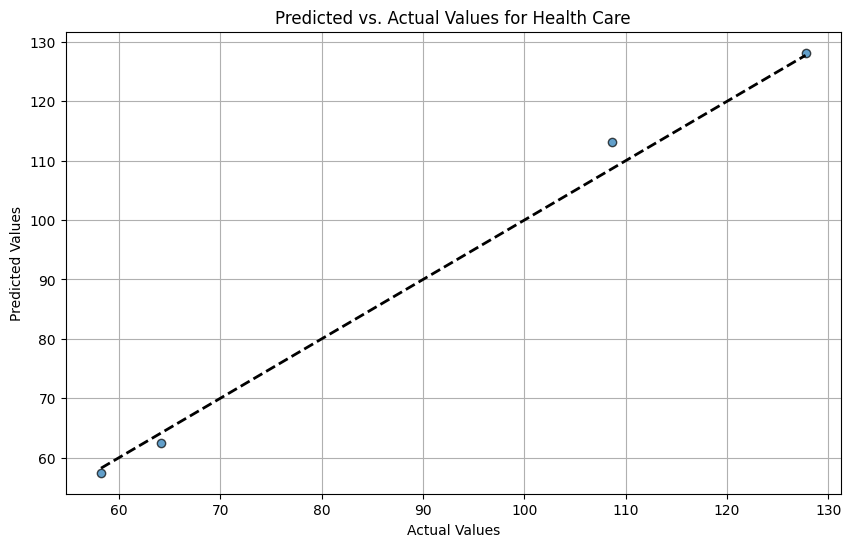

In [36]:
SGDReg(0.2, "Health Care")

Mean Squared Error: 2.96630489113503


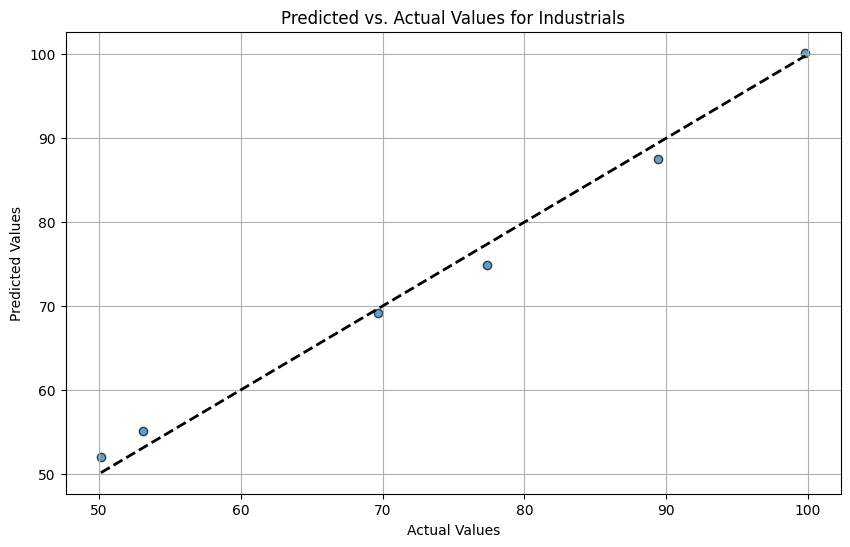

In [37]:
SGDReg(0.3, "Industrials")

Mean Squared Error: 2.110729967124219


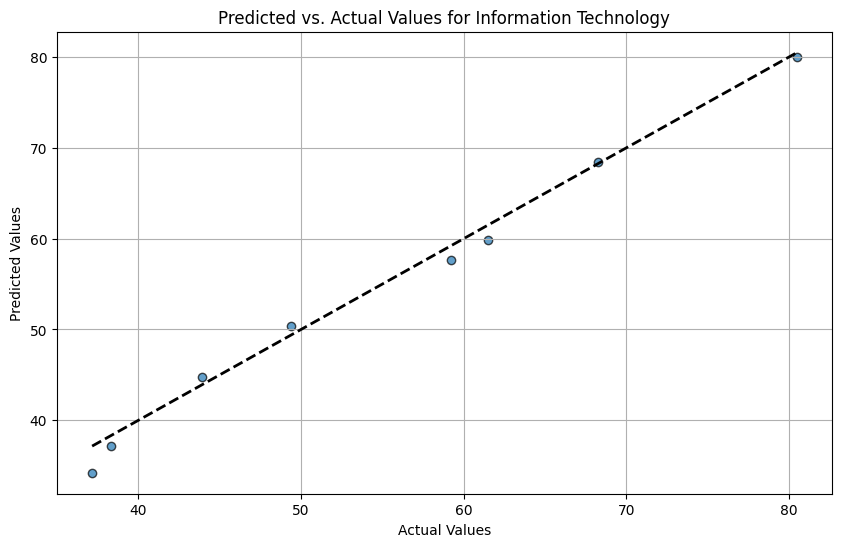

In [38]:
SGDReg(0.4, "Information Technology") 

Mean Squared Error: 4.961598180501632


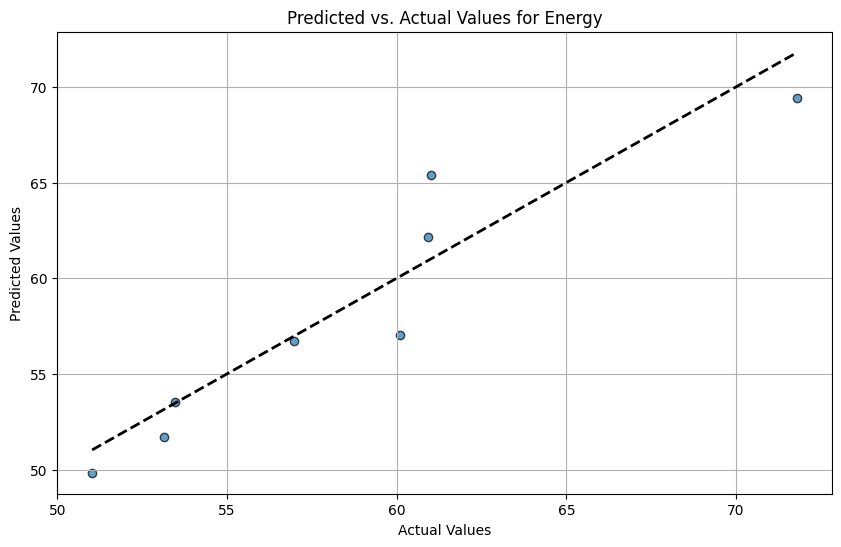

In [39]:
#Energy Stochastic Gradient Descent
SGDReg(0.4, "Energy") 

Mean Squared Error: 1.6855093502619864


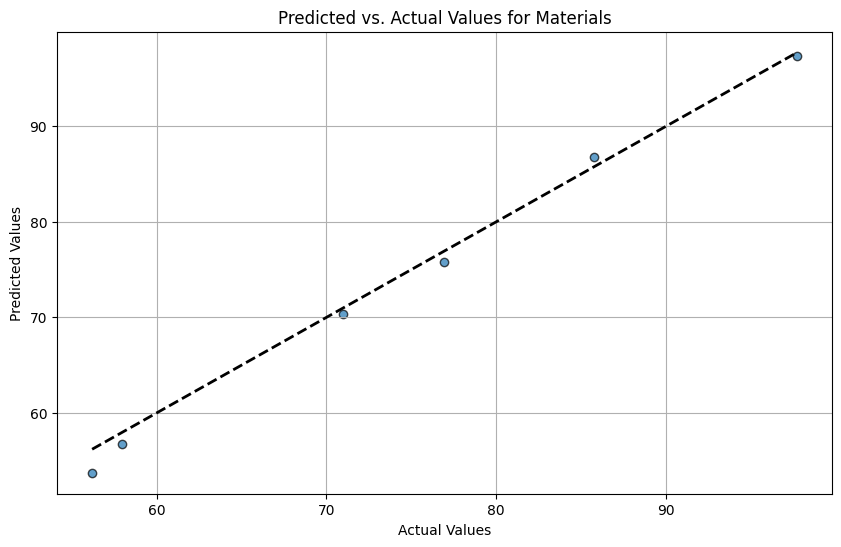

In [40]:
SGDReg(0.3, "Materials")

<a id="conclusion"></a>
### <b>Interpretation: Insight & Policy Decision</b>

While conducting our data analysis we came to the conclusion that there are various factors which influence the growth of certain industries stocks more than others. As both our analysis and predictions show, the sectors – Consumer Discretionary, Real Estate, Health Care, Industrials, and Information Technology – are affected more by unemployment while sectors – Energy, Materials, and Industrials – are affected more by GDP. This also relates to our initial idea that unemployment will have an inverse  relationship with the sectors it affects while GDP has a linear or same moving trend as the sectors it affects. 

We also can identify that we didn't incorporate 4 sectors into our analysis. This was because those sectors were not very affected by the economic evaluations we were looking at. For example, financials are more affected by interest rates compared to GDP and unemployment. Now, this doesn’t mean there’s no relationship between those sectors and our economic indicators. This just shows that the small relationship can be considered statistically insignificant since there's either a slight or no change for each of those sectors. 

What we can get from this complete analysis and prediction is that although we can see the S&P 500 moving in a rather positive and growing direction, economic factors, especially dramatic ones, can have long term effects. We can also conclude that it is important to look at other factors, as our Energy data showed a skew because of unforeseen and non predictable events which happened during the timeline of which our data was collected. Although interest rates would have been a relevant factor here, we didn’t include them in our analysis because we wanted to show how one factor can affect the stock prices, so by removing a larger economic factor we were able to easily show this.
